# Estudios y empleabilidad (Encuesta Kaggle)

El Presente trabajo analiza la encuesta del dataset de https://www.kaggle.com/datasets/lainguyn123/employee-survey?select=employee_survey.csv

Dicho dataset es una encueta de trabajo a distintos públicos que muestra factores como genero, satisfacción y otros que se detallarán más adelante.

## Agenda

- [Estudios y empleabilidad (Encuesta Kaggle)](#estudios-y-empleabilidad-encuesta-kaggle)
  - [Objetivo](#objetivo)
  - [Hipotesis](#hipotesis)
  - [Limitantes](#limitantes)
- [Dataset](#dataset)
  - [Descripción de variables](#descripción-de-variables)
- [Importación de librerias](#importación-de-librerias)
- [Análisis Exploratorio](#análisis-exploratorio)
  - [Nivel Educativo vs Nivel de trabajo](#nivel-educativo-vs-nivel-de-trabajo)
    - [Grafico de caja](#grafico-de-caja)
  - [Genero vs Satisfacción laboral](#genero-vs-satisfacción-laboral)
    - [Gráfico de cajas](#gráfico-de-cajas)
  - [JobLevel vs Overtime](#joblevel-vs-overtime)
  - [Headmap de correlación](#headmap-de-correlación)
- [Conclusiones análisis exploratorio](#conclusiones-análisis-exploratorio)
- [Machine Learning](#machine-learning)
  - [División train - test](#división-train---test)
  - [K-meas](#k-meas)
    - [Uso de variables númericas](#uso-de-variables-númericas)
    - [Escalado](#escalado)
    - [Clustering](#clustering)
  - [One-hot encoding y label encoding](#one-hot-encoding-y-label-encoding)
    - [Limpieza df](#limpieza-df)
    - [División para one-hot encoding y label encoding](#división-para-one-hot-encoding-y-label-encoding)
  - [Regresión Logística](#regresión-logística)
  - [Árboles de desición](#árboles-de-desición)
  - [Random forest](#random-forest)
  - [XGBoost](#xgboost)
  - [Vecinos cercanos (KNN)](#vecinos-cercanos-knn)
  - [Comparación de módelos](#comparación-de-módelos)
- [Conclusiones Machine Learning](#conclusiones-machine-learning)

## Objetivo

El objetivo del presente trabajo es ver si el nivel de estudios (y otras variables) tienen relación con conseguir un mejor trabajo (nivel de satisfacción).

## Hipotesis

a. Mientras mayor es el nivel de estudios, mayor es el nivel de trabajo que tiene (JobLevel). <br>
b. Por políticas de igualdad de género, la diferencia entre el nivel de satisfacción entre hombres y mujeres debe ser menor a 0.5 puntos. <br>
c. Los trabajos de mayor rango (JobLevel: Senior y Lider) tienen más sobretiempo en promedio.

## Limitantes

El trabajo esta enmarcado en la encuesta del dataset de https://www.kaggle.com/datasets/lainguyn123/employee-survey?select=employee_survey.csv

# Dataset

## Descripción de variables

<li>	EmpID	:	ID del empleado	.	</li>
<li>	Gender	:	Genero del empleado	.	</li>
<li>	Age	:	Edad del empleado	.	</li>
<li>	MaritalStatus	:	Estado Marital (casado, soltero, divorsiado, viudo)	.	</li>
<li>	JobLevel	:	Nivel de empleado (Interno, Junior, Semi-senior, Senieor, Lider)	.	</li>
<li>	Experience	:	Años de experiencia	.	</li>
<li>	Dept	:	Área donde trabaja	.	</li>
<li>	EmpType	:	Tipo de empleo (full-time, part-time, Contrato)	.	</li>
<li>	WLB	:	Puntuación de vida de trabajo, del 1 al 5	.	</li>
<li>	WorkEnv	:	Puntuación de ambiente laboral del 1 al 5	.	</li>
<li>	PhysicalActivityHours	:	Numero de horas de actividad física por semana.	.	</li>
<li>	Workload	:	Puntuación de carga de trabajo del 1 al 5	.	</li>
<li>	Stress	:	Puntuación de estrés en el trabajo de 1 al 5	.	</li>
<li>	SleepHours	:	Numero de horas que duerme por noche	.	</li>
<li>	CommuteMode	:	Modo de desplazamiento al trabajo (coche, transporte público, bicicleta, a pie, moto)	.	</li>
<li>	CommuteDistance	:	Distacia de desplazamiento al trabajo (en Km)	.	</li>
<li>	NumCompanies	:	Numero de diferentes compañias en el que el trabajado va trabajando	.	</li>
<li>	TeamSize	:	Tamaño del equipo al que pertenece	.	</li>
<li>	NumReports	:	Numero de trabajadores que le reportan (solo aplica a seniors y lideres)	.	</li>
<li>	EduLevel	:	Nivel de educación	.	</li>
<li>	haveOT	:	Hace horas extras (verdadero/falso)	.	</li>
<li>	TrainingHoursPerYear	:	Numero de horas de entrenamiento recibido por año	.	</li>
<li>	JobSatisfaction	:	Puntuación de satisfacción del trabajo del 1 al 5	.	</li>


# Importación de librerias

In [1]:
# Manejo de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Preprocesamiento
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Modelos de clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

# Evaluación de métricas
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report

# Clustering
from sklearn.cluster import KMeans

# Otros
import os


In [2]:
# Creación de carpeta para gráficos para ppt
if not os.path.exists('graficos'):
    os.makedirs('graficos')

# Análisis Exploratorio

Carga del Dataframe

In [3]:
# Importo el dataset de Github
url = 'https://raw.githubusercontent.com/JoseChirif/Estudios-y-empleabilidad-Encuesta-kaggle/refs/heads/main/employee_survey.csv'

# Carlo el dataset
df = pd.read_csv(url)

#Verifico el dataset
df.head()

,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,WLB,WorkEnv,...,SleepHours,CommuteMode,CommuteDistance,NumCompanies,TeamSize,NumReports,EduLevel,haveOT,TrainingHoursPerYear,JobSatisfaction
0,6,Male,32,Married,Mid,7,IT,Full-Time,1,1,...,7.6,Car,20,3,12,0,Bachelor,True,33.5,5
1,11,Female,34,Married,Mid,12,Finance,Full-Time,1,1,...,7.9,Car,15,4,11,0,Bachelor,False,36.0,5
2,33,Female,23,Single,Intern/Fresher,1,Marketing,Full-Time,2,4,...,6.5,Motorbike,17,0,30,0,Bachelor,True,10.5,5
3,20,Female,29,Married,Junior,6,IT,Contract,2,2,...,7.5,Public Transport,13,2,9,0,Bachelor,True,23.0,5
4,28,Other,23,Single,Junior,1,Sales,Part-Time,3,1,...,4.9,Car,20,0,7,0,Bachelor,False,20.5,5


Transformar valores a Español

In [4]:
##GENDER
# Crear un diccionario para el mapeo de valores
gender_map = {
    'Male': 'Masculino',
    'Female': 'Femenino',
    'Other': 'Otros'
}
# Reemplazar los valores en la columna 'Gender'
df['Gender'] = df['Gender'].replace(gender_map)
#Imprimo valores
print(f'Gender:')
print(df['Gender'].unique())
print(f'\n')


##DEPT
# Crear un diccionario para el mapeo de valores
Dept_map = {
    'IT': 'TI',
    'Finance': 'Finanzas',
    'Sales': 'Ventas',
    'Operations': 'Operaciones',
    'Customer Service': 'Servicio al cliente',
    'HR': 'Recursos Humanos'
}
# Reemplazar los valores en la columna 'Gender'
df['Dept'] = df['Dept'].replace(Dept_map)
#Imprimo valores
print(f'Dept')
print(df['Dept'].unique())
print(f'\n')



##EmpType
# Crear un diccionario para el mapeo de valores
EmpType_map = {
    'Contract': 'Contrato'
}
# Reemplazar los valores en la columna 'Gender'
df['EmpType'] = df['EmpType'].replace(EmpType_map)
#Imprimo valores
print(f'EmpType')
print(df['EmpType'].unique())
print(f'\n')


##CommuteMode
# Crear un diccionario para el mapeo de valores
CommuteMode_map = {
    'Car': 'Carro',
    'Motorbike': 'Moto',
    'Public Transport': 'Transporte Público',
    'Bike': 'Bicicleta',
    'Walk': 'Camina'
}
# Reemplazar los valores en la columna 'Gender'
df['CommuteMode'] = df['CommuteMode'].replace(CommuteMode_map)
#Imprimo valores
print(f'CommuteMode')
print(df['CommuteMode'].unique())
print(f'\n')



##EduLevel
# Crear un diccionario para el mapeo de valores
EduLevel_map = {
    'High School': '1 - Secundaria',
    'Bachelor': '2 - Bachiller',
    'Master': '3 - Master',
    'PhD': '4 - PhD'
}
# Reemplazar los valores en la columna 'Gender'
df['EduLevel'] = df['EduLevel'].replace(EduLevel_map)
#Imprimo valores
print(f'EduLevel:')
print(df['EduLevel'].unique())
print(f'\n')


##JobLevel
# Crear un diccionario para el mapeo de valores
JobLevel_map = {
    'Intern/Fresher': '1 - Practicante',
    'Junior': '2 - Junior',
    'Mid': '3 - Semi-senior',
    'Senior': '4 - Senior',
    'Lead': '5 - Lider'
}
# Reemplazar los valores en la columna 'Gender'
df['JobLevel'] = df['JobLevel'].replace(JobLevel_map)
#Imprimo valores
print(f'JobLevel:')
print(df['JobLevel'].unique())
print(f'\n')



##MaritalStatus
# Crear un diccionario para el mapeo de valores
MaritalStatus_map = {
    'Married': 'Casado',
    'Single': 'soltero',
    'Divorced': 'Divorciado',
    'Widowed': 'Viudo'
}
# Reemplazar los valores en la columna 'Gender'
df['MaritalStatus'] = df['MaritalStatus'].replace(MaritalStatus_map)
#Imprimo valores
print(f'MaritalStatus')
print(df['MaritalStatus'].unique())
print(f'\n')

Gender:
['Masculino' 'Femenino' 'Otros']


Dept
['TI' 'Finanzas' 'Marketing' 'Ventas' 'Operaciones' 'Servicio al cliente'
 'Legal' 'Recursos Humanos']


EmpType
['Full-Time' 'Contrato' 'Part-Time']


CommuteMode
['Carro' 'Moto' 'Transporte Público' 'Bicicleta' 'Camina']


EduLevel:
['2 - Bachiller' '1 - Secundaria' '3 - Master' '4 - PhD']


JobLevel:
['3 - Semi-senior' '1 - Practicante' '2 - Junior' '4 - Senior' '5 - Lider']


MaritalStatus
['Casado' 'soltero' 'Divorciado' 'Viudo']




## Nivel Educativo vs Nivel de trabajo

En base a la primera hipótesis (Mientras mayor es el nivel de estudios, mayor es el nivel de trabajo que tiene (JobLevel).), Graficare si existe relación entre ambas.

In [5]:
# Creo las columnas numericas que categoricen EduLevel y JobLevel
df['EduLevel_categoria'] = df['EduLevel'].str.split(' - ', expand=True)[0].astype(int)
df['JobLevel_categoria'] = df['JobLevel'].str.split(' - ', expand=True)[0].astype(int)

In [6]:
df.head()

,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,WLB,WorkEnv,...,CommuteDistance,NumCompanies,TeamSize,NumReports,EduLevel,haveOT,TrainingHoursPerYear,JobSatisfaction,EduLevel_categoria,JobLevel_categoria
0,6,Masculino,32,Casado,3 - Semi-senior,7,TI,Full-Time,1,1,...,20,3,12,0,2 - Bachiller,True,33.5,5,2,3
1,11,Femenino,34,Casado,3 - Semi-senior,12,Finanzas,Full-Time,1,1,...,15,4,11,0,2 - Bachiller,False,36.0,5,2,3
2,33,Femenino,23,soltero,1 - Practicante,1,Marketing,Full-Time,2,4,...,17,0,30,0,2 - Bachiller,True,10.5,5,2,1
3,20,Femenino,29,Casado,2 - Junior,6,TI,Contrato,2,2,...,13,2,9,0,2 - Bachiller,True,23.0,5,2,2
4,28,Otros,23,soltero,2 - Junior,1,Ventas,Part-Time,3,1,...,20,0,7,0,2 - Bachiller,False,20.5,5,2,2


### Grafico de caja

C:\Users\carlo\AppData\Local\Temp\ipykernel_17936\2701918152.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='JobLevel_categoria', y='EduLevel_categoria', data=df_temp, palette='viridis')


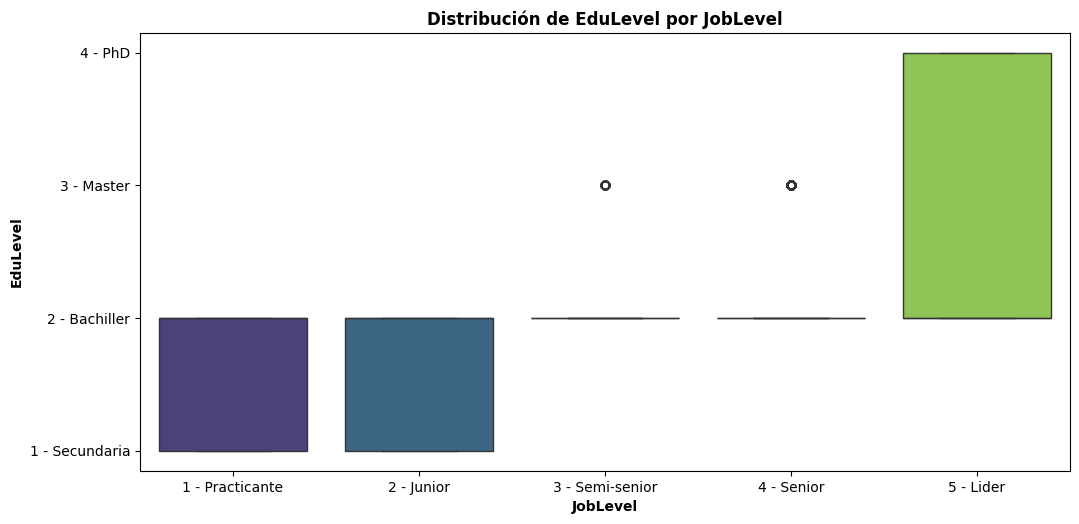

In [7]:
#Trabajare sobre un df_temp
df_temp = df.copy()


# Crear mapeos de categorías originales a numéricas
edu_levels_mapping = df_temp[['EduLevel', 'EduLevel_categoria']].drop_duplicates().sort_values('EduLevel_categoria')
job_levels_mapping = df_temp[['JobLevel', 'JobLevel_categoria']].drop_duplicates().sort_values('JobLevel_categoria')

# Crear mapeos de los valores numéricos a categorías originales
edu_levels_rev_mapping = edu_levels_mapping.set_index('EduLevel_categoria')['EduLevel'].to_dict()
job_levels_rev_mapping = job_levels_mapping.set_index('JobLevel_categoria')['JobLevel'].to_dict()

# Crear el gráfico de caja
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='JobLevel_categoria', y='EduLevel_categoria', data=df_temp, palette='viridis')

# Ajustar los detalles del gráfico
plt.title('Distribución de EduLevel por JobLevel', fontweight='bold')
plt.xlabel('JobLevel', fontweight='bold')
plt.ylabel('EduLevel', fontweight='bold')

# Obtener valores únicos y ordenados para los ticks del eje x
job_level_ticks = sorted(df_temp['JobLevel_categoria'].unique())
# Desplazar los ticks del eje x a la izquierda
adjusted_ticks = [tick - 1 for tick in job_level_ticks]

# Reemplazar etiquetas del eje x con categorías originales
ax.set_xticks(adjusted_ticks)
ax.set_xticklabels([job_levels_rev_mapping[i] for i in job_level_ticks])

# Reemplazar etiquetas del eje y con categorías originales
edu_level_ticks = sorted(df_temp['EduLevel_categoria'].unique())
ax.set_yticks(edu_level_ticks)
ax.set_yticklabels([edu_levels_rev_mapping[i] for i in edu_level_ticks])

# Ajustar el margen inferior para dar más espacio a las etiquetas del eje x
plt.subplots_adjust(bottom=0.15)

# Quitar las líneas de cuadrícula
plt.grid(False)

# Guardar el gráfico como una imagen
plt.savefig('graficos/Grafico1', bbox_inches='tight')

plt.show()


C:\Users\carlo\AppData\Local\Temp\ipykernel_17936\3035119390.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='EduLevel_categoria_jittered', y='JobLevel_categoria_jittered', data=df_temp, alpha=0.6, palette='viridis')


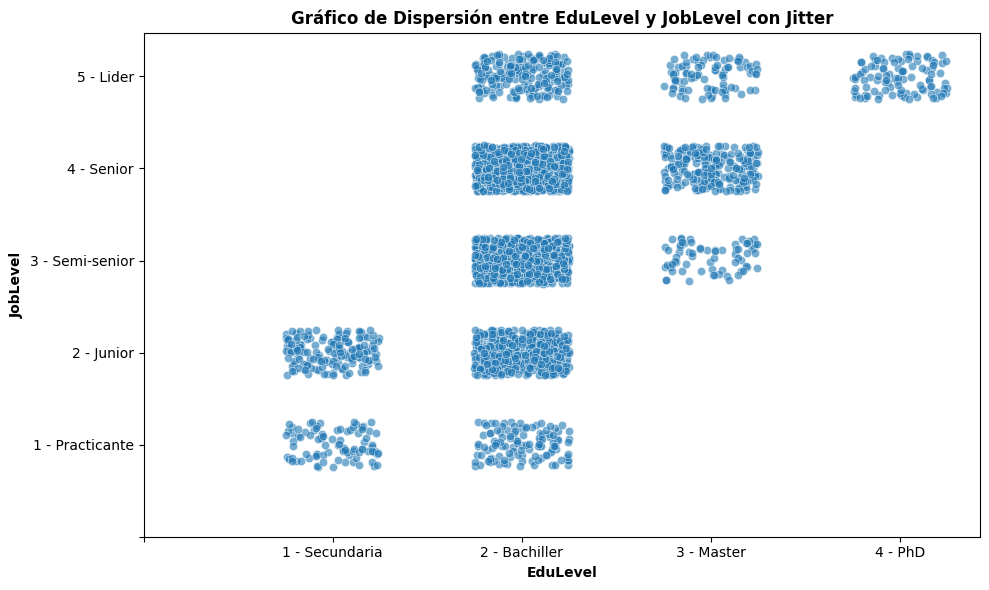

In [8]:
## Scatter plot (Con jitter para notar la acumulación de puntos)

# Crear mapeos de categorías originales a numéricas
edu_levels_mapping = df_temp[['EduLevel', 'EduLevel_categoria']].drop_duplicates().sort_values('EduLevel_categoria')
job_levels_mapping = df_temp[['JobLevel', 'JobLevel_categoria']].drop_duplicates().sort_values('JobLevel_categoria')

# Crear mapeos de los valores numéricos a categorías originales
edu_levels_rev_mapping = edu_levels_mapping.set_index('EduLevel_categoria')['EduLevel'].to_dict()
job_levels_rev_mapping = job_levels_mapping.set_index('JobLevel_categoria')['JobLevel'].to_dict()

# Añadir jitter a los datos
jitter_strength = 0.25
df_temp['EduLevel_categoria_jittered'] = df_temp['EduLevel_categoria'] + np.random.uniform(-jitter_strength, jitter_strength, size=len(df_temp))
df_temp['JobLevel_categoria_jittered'] = df_temp['JobLevel_categoria'] + np.random.uniform(-jitter_strength, jitter_strength, size=len(df_temp))

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='EduLevel_categoria_jittered', y='JobLevel_categoria_jittered', data=df_temp, alpha=0.6, palette='viridis')

# Configurar el título y las etiquetas
plt.title('Gráfico de Dispersión entre EduLevel y JobLevel con Jitter', fontweight='bold')
plt.xlabel('EduLevel', fontweight='bold')
plt.ylabel('JobLevel', fontweight='bold')

# Configurar ticks en el eje x
xticks = np.arange(int(df_temp['EduLevel_categoria_jittered'].min()), int(df_temp['EduLevel_categoria_jittered'].max()) + 1, 1)
plt.xticks(ticks=xticks, labels=[edu_levels_rev_mapping.get(int(x), '') for x in xticks])

# Configurar ticks en el eje y
yticks = np.arange(int(df_temp['JobLevel_categoria_jittered'].min()), int(df_temp['JobLevel_categoria_jittered'].max()) + 1, 1)
plt.yticks(ticks=yticks, labels=[job_levels_rev_mapping.get(int(y), '') for y in yticks])

# Ajusta el diseño para que se ajuste a la figura
plt.tight_layout()  
# Guardar el gráfico como una imagen
plt.savefig('graficos/Grafico2 - scatterplot jitter', bbox_inches='tight')
# Mostrar el gráfico
plt.show()

In [9]:
# Crear la tabla de contingencia con conteos
contingency_table = pd.crosstab(df_temp['JobLevel'], df_temp['EduLevel'])

# Convertir los conteos en porcentajes
contingency_table_percentage = contingency_table.div(contingency_table.sum().sum(), axis=None) * 100

# Redondear a dos decimalesz
contingency_table_percentage = contingency_table_percentage.round(2)

# Mostrar resultados
display(contingency_table_percentage)

EduLevel,1 - Secundaria,2 - Bachiller,3 - Master,4 - PhD
JobLevel,,,,
1 - Practicante,2.91,3.77,0.00,0.00
2 - Junior,5.19,14.71,0.00,0.00
3 - Semi-senior,0.00,23.07,2.25,0.00
4 - Senior,0.00,27.90,7.44,0.00
5 - Lider,0.00,6.58,2.88,3.31


In [10]:
print(f'Los Bachilleres Junior, Semi-senior y Senior son el total de {14.71 + 23.07 + 27.9} % de la población')

Los Bachilleres Junior, Semi-senior y Senior son el total de 65.68 % de la población


En efecto se observa relación del Nivel de educación con el puesto de trabajo. Sin embargo, es una relación media, ya que la mayoria de puestos son de bachilleres que van desde Junior hasta Senior.

## Genero vs Satisfacción laboral

En base a la segunda hipótesis (Por políticas de igualdad de género, la diferencia entre el nivel de satisfacción entre hombres y mujeres debe ser menor a 0.5 puntos.), Graficare si existe relación entre ambas.

In [11]:
## Creo la columnas numerica que categoricen Gender
# Obtener los valores únicos de la columna Gender
unique_genders = df['Gender'].unique()

# Crear un diccionario de mapeo con índices comenzando desde 1 para cada valor único
gender_category_mapping = {gender: idx + 1 for idx, gender in enumerate(unique_genders)}

# Crear una nueva columna Gender_categoria utilizando el diccionario de mapeo
df['Gender_categoria'] = df['Gender'].map(gender_category_mapping)


In [12]:
#Imprimo la relacion Gender_categoria y Gender
# Seleccionar solo las columnas Gender_categoria y Gender y eliminar duplicados
result_df = df[['Gender_categoria', 'Gender']].drop_duplicates()

# Imprimir el DataFrame resultante sin mostrar el índice
print(result_df.to_string(index=False))


 Gender_categoria    Gender
                1 Masculino
                2  Femenino
                3     Otros


In [13]:
# Mostrar los valores únicos y los primeros registros del DataFrame para verificar
df.head()


,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,WLB,WorkEnv,...,NumCompanies,TeamSize,NumReports,EduLevel,haveOT,TrainingHoursPerYear,JobSatisfaction,EduLevel_categoria,JobLevel_categoria,Gender_categoria
0,6,Masculino,32,Casado,3 - Semi-senior,7,TI,Full-Time,1,1,...,3,12,0,2 - Bachiller,True,33.5,5,2,3,1
1,11,Femenino,34,Casado,3 - Semi-senior,12,Finanzas,Full-Time,1,1,...,4,11,0,2 - Bachiller,False,36.0,5,2,3,2
2,33,Femenino,23,soltero,1 - Practicante,1,Marketing,Full-Time,2,4,...,0,30,0,2 - Bachiller,True,10.5,5,2,1,2
3,20,Femenino,29,Casado,2 - Junior,6,TI,Contrato,2,2,...,2,9,0,2 - Bachiller,True,23.0,5,2,2,2
4,28,Otros,23,soltero,2 - Junior,1,Ventas,Part-Time,3,1,...,0,7,0,2 - Bachiller,False,20.5,5,2,2,3


### Gráfico de cajas

C:\Users\carlo\AppData\Local\Temp\ipykernel_17936\2088423229.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Gender', y='JobSatisfaction', data=df, palette='viridis', showmeans=False)


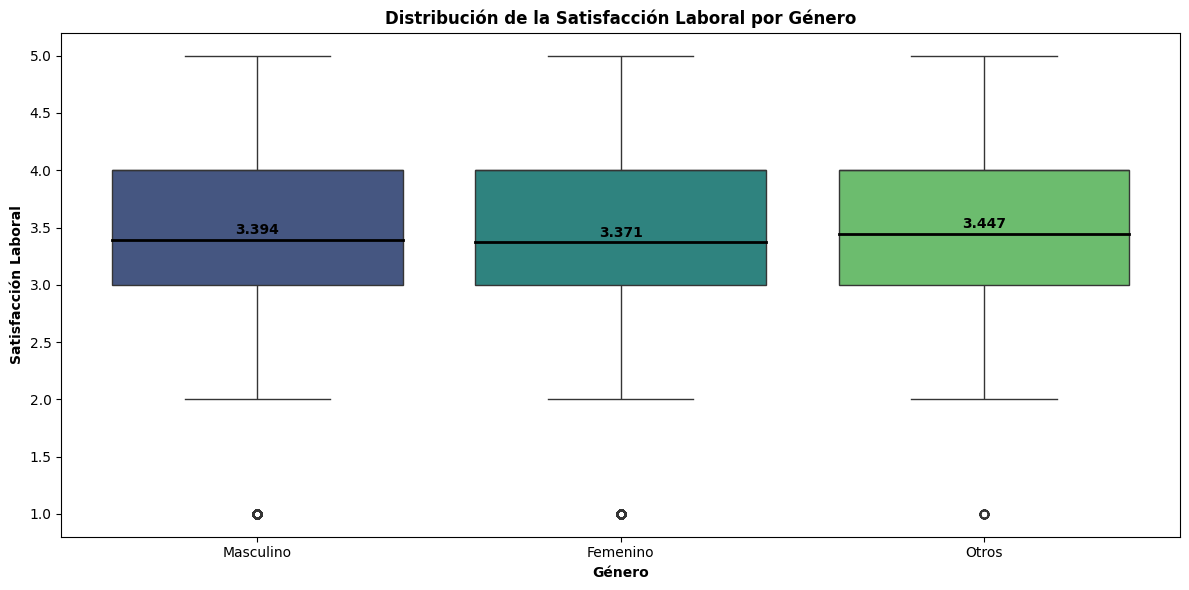

In [14]:
# Crear el gráfico de caja
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='Gender', y='JobSatisfaction', data=df, palette='viridis', showmeans=False)

# Calcular las medias
means = df.groupby('Gender')['JobSatisfaction'].mean().reset_index()

# Añadir líneas negras para las medias y etiquetas de porcentaje
for i, (gender, mean) in enumerate(zip(means['Gender'], means['JobSatisfaction'])):
    # Dibujar una línea negra que atraviese completamente el ancho de la caja
    ax.plot([i - 0.4, i + 0.4], [mean, mean], color='black', lw=2, label=f'Media {gender}' if i == 0 else "")
    
    # Convertir la media a un porcentaje o un número formateado y añadir una etiqueta justo encima de la línea
    label = f'{mean:.3f}'
    ax.text(i, mean + 0.05, label, horizontalalignment='center', size='medium', color='black', weight='semibold')

# Configurar el título y las etiquetas
plt.title('Distribución de la Satisfacción Laboral por Género', fontweight='bold')
plt.xlabel('Género', fontweight='bold')
plt.ylabel('Satisfacción Laboral', fontweight='bold')

# Eliminar las gridlines
plt.grid(False)

# Ajusta el diseño para que se ajuste a la figura
plt.tight_layout()  
# Guardar el gráfico como una imagen
plt.savefig('graficos/Grafico3 - boxes', bbox_inches='tight')
# Mostrar el gráfico
plt.show()


Se demuestra que es similar, la diferencia máxima de puntaje entre generos es de 0.053 puntos. Por lo que la segunda hipótesis tambien es verdadera.

## JobLevel vs Overtime

Según la tercera hipótesis, Los trabajos de mayor rango (JobLevel: Senior y Lider) tienen más sobretiempo en promedio. Ello se comprobrará a continuación.

In [15]:
# Contar la cantidad de True y False para cada JobLevel
counts = df.groupby(['JobLevel', 'haveOT']).size().unstack(fill_value=0)

# Calcular los porcentajes
percentages = counts.divide(counts.sum(axis=1), axis=0) * 100
percentages = percentages.round(2)

# Combinar los conteos y porcentajes en un solo DataFrame
summary = pd.concat([counts, percentages], axis=1, keys=['Cantidad', 'Porcentajes'])

In [16]:
summary

Cantidad       Porcentajes       
haveOT             False True        False  True 
JobLevel                                         
1 - Practicante      144    58       71.29  28.71
2 - Junior           420   182       69.77  30.23
3 - Semi-senior      511   255       66.71  33.29
4 - Senior           747   322       69.88  30.12
5 - Lider            267   119       69.17  30.83

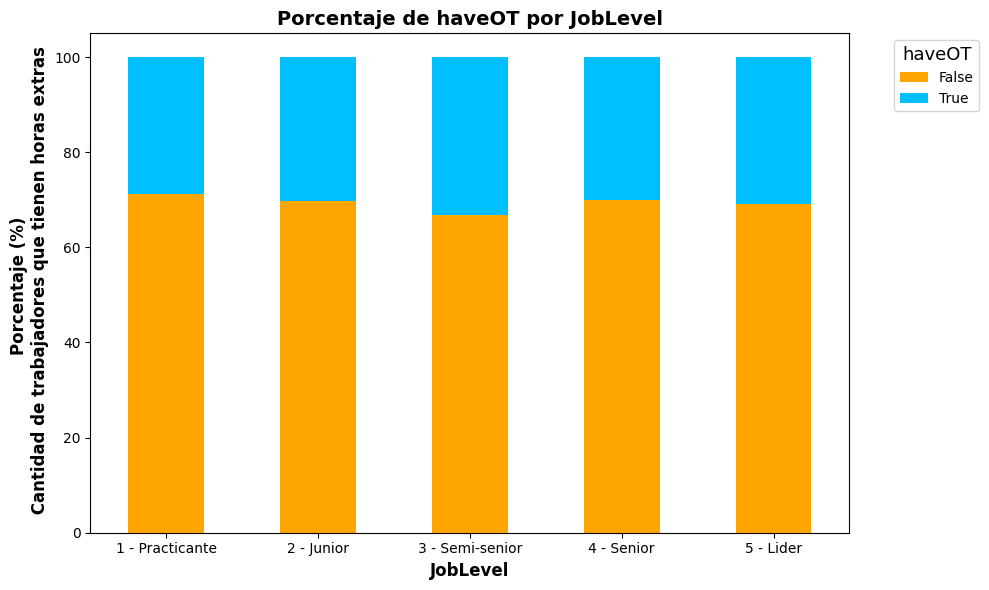

In [17]:
## Crear gráfico de barras apiladas
ax = percentages.plot(kind='bar', stacked=True, color=['#FFA500','#00BFFF'], figsize=(10, 6))  # Invertir los colores

# Configuración de los títulos y etiquetas
plt.title('Porcentaje de haveOT por JobLevel', fontsize=14, fontweight='bold')
plt.xlabel('JobLevel', fontsize=12, fontweight='bold')
plt.ylabel('Porcentaje (%) \n Cantidad de trabajadores que tienen horas extras', fontsize=12, fontweight='bold')

# Configurar las etiquetas del eje x para que no se roten
plt.xticks(rotation=0)

# Mostrar la leyenda a la derecha con el orden invertido
plt.legend(title='haveOT', title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left', labels=['False','True'])

# Ajustar el layout para que no se corte la leyenda
plt.tight_layout()

# Guardar el gráfico como una imagen
plt.savefig('graficos/Grafico4 - barras porc', bbox_inches='tight')

# Mostrar el gráfico
plt.show()


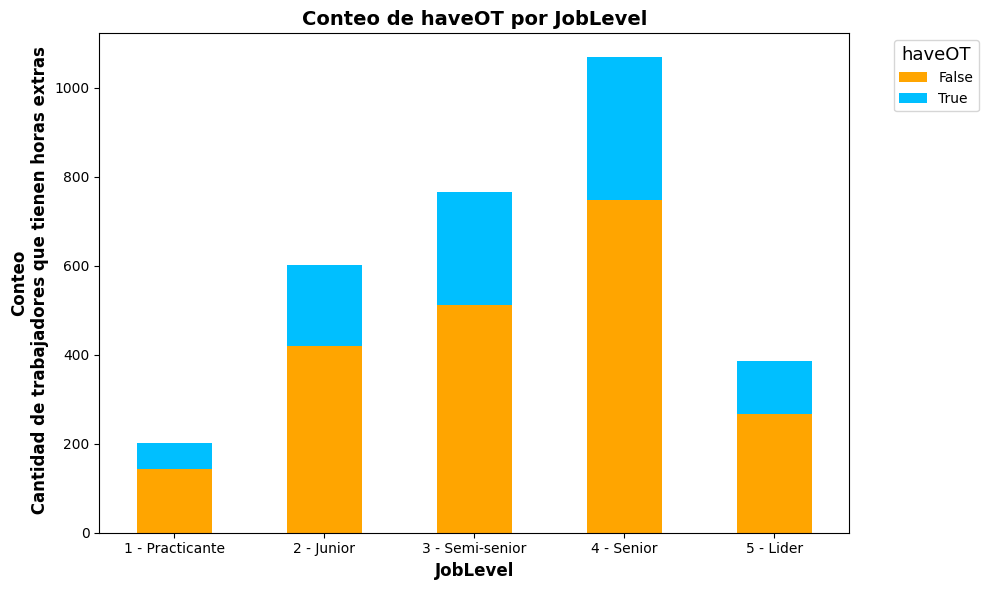

In [18]:
## Crear gráfico de barras apiladas
ax = counts.plot(kind='bar', stacked=True, color=['#FFA500','#00BFFF'], figsize=(10, 6))

# Configuración de los títulos y etiquetas
plt.title('Conteo de haveOT por JobLevel', fontsize=14, fontweight='bold')
plt.xlabel('JobLevel', fontsize=12, fontweight='bold')
plt.ylabel('Conteo\n Cantidad de trabajadores que tienen horas extras', fontsize=12, fontweight='bold')

# Configurar las etiquetas del eje x para que no se roten
plt.xticks(rotation=0)

# Mostrar la leyenda a la derecha
plt.legend(title='haveOT', title_fontsize='13', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar el layout para que no se corte la leyenda
plt.tight_layout()

# Guardar el gráfico como una imagen
plt.savefig('graficos/Grafico5 - barras', bbox_inches='tight')

# Mostrar el gráfico
plt.show()


Se ve que se entrevistaron más seniors. Pero porcentualemnte el nivel de satisfacción es igual independientemente del puesto. Por tanto, la tercera hipótesis es falsa.

## Headmap de correlación

Para corroborar, haré un headmap de correlación. 
Como primer paso creare las variable categoricas (númericas) de aquellos que tienen valores textuales o alfanumericos.

In [19]:
print(df.dtypes)

EmpID                      int64
Gender                    object
Age                        int64
MaritalStatus             object
JobLevel                  object
Experience                 int64
Dept                      object
EmpType                   object
WLB                        int64
WorkEnv                    int64
PhysicalActivityHours    float64
Workload                   int64
Stress                     int64
SleepHours               float64
CommuteMode               object
CommuteDistance            int64
NumCompanies               int64
TeamSize                   int64
NumReports                 int64
EduLevel                  object
haveOT                      bool
TrainingHoursPerYear     float64
JobSatisfaction            int64
EduLevel_categoria         int64
JobLevel_categoria         int64
Gender_categoria           int64
dtype: object


In [20]:
## Creo la columnas numerica que categoricen MaritalStatus
# Obtener los valores únicos de la columna MaritalStatus
unique_MaritalStatus = df['MaritalStatus'].unique()

# Crear un diccionario de mapeo con índices comenzando desde 1 para cada valor único
MaritalStatus_category_mapping = {MaritalStatus: idx + 1 for idx, MaritalStatus in enumerate(unique_MaritalStatus)}

# Crear una nueva columna MaritalStatus_categoria utilizando el diccionario de mapeo
df['MaritalStatus_categoria'] = df['MaritalStatus'].map(MaritalStatus_category_mapping)

#Imprimo la relacion MaritalStatus_categoria y MaritalStatus
# Seleccionar solo las columnas MaritalStatus_categoria y MaritalStatus y eliminar duplicados
result_df = df[['MaritalStatus_categoria', 'MaritalStatus']].drop_duplicates()

# Imprimir el DataFrame resultante sin mostrar el índice
print(result_df.to_string(index=False))

 MaritalStatus_categoria MaritalStatus
                       1        Casado
                       2       soltero
                       3    Divorciado
                       4         Viudo


In [21]:

## Creo la columnas numerica que categoricen Dept
# Obtener los valores únicos de la columna Dept
unique_Dept = df['Dept'].unique()

# Crear un diccionario de mapeo con índices comenzando desde 1 para cada valor único
Dept_category_mapping = {Dept: idx + 1 for idx, Dept in enumerate(unique_Dept)}

# Crear una nueva columna Dept_categoria utilizando el diccionario de mapeo
df['Dept_categoria'] = df['Dept'].map(Dept_category_mapping)

#Imprimo la relacion Dept_categoria y Dept
# Seleccionar solo las columnas Dept_categoria y Dept y eliminar duplicados
result_df = df[['Dept_categoria', 'Dept']].drop_duplicates()

# Imprimir el DataFrame resultante sin mostrar el índice
print(result_df.to_string(index=False))


 Dept_categoria                Dept
              1                  TI
              2            Finanzas
              3           Marketing
              4              Ventas
              5         Operaciones
              6 Servicio al cliente
              7               Legal
              8    Recursos Humanos


In [22]:
## Creo la columnas numerica que categoricen EmpType
# Obtener los valores únicos de la columna EmpType
unique_EmpType = df['EmpType'].unique()

# Crear un diccionario de mapeo con índices comenzando desde 1 para cada valor único
EmpType_category_mapping = {EmpType: idx + 1 for idx, EmpType in enumerate(unique_EmpType)}

# Crear una nueva columna EmpType_categoria utilizando el diccionario de mapeo
df['EmpType_categoria'] = df['EmpType'].map(EmpType_category_mapping)

#Imprimo la relacion EmpType_categoria y EmpType
# Seleccionar solo las columnas EmpType_categoria y EmpType y eliminar duplicados
result_df = df[['EmpType_categoria', 'EmpType']].drop_duplicates()

# Imprimir el DataFrame resultante sin mostrar el índice
print(result_df.to_string(index=False))

 EmpType_categoria   EmpType
                 1 Full-Time
                 2  Contrato
                 3 Part-Time


In [23]:

## Creo la columnas numerica que categoricen CommuteMode
# Obtener los valores únicos de la columna CommuteMode
unique_CommuteMode = df['CommuteMode'].unique()

# Crear un diccionario de mapeo con índices comenzando desde 1 para cada valor único
CommuteMode_category_mapping = {CommuteMode: idx + 1 for idx, CommuteMode in enumerate(unique_CommuteMode)}

# Crear una nueva columna CommuteMode_categoria utilizando el diccionario de mapeo
df['CommuteMode_categoria'] = df['CommuteMode'].map(CommuteMode_category_mapping)

#Imprimo la relacion CommuteMode_categoria y CommuteMode
# Seleccionar solo las columnas CommuteMode_categoria y CommuteMode y eliminar duplicados
result_df = df[['CommuteMode_categoria', 'CommuteMode']].drop_duplicates()

# Imprimir el DataFrame resultante sin mostrar el índice
print(result_df.to_string(index=False))

 CommuteMode_categoria        CommuteMode
                     1              Carro
                     2               Moto
                     3 Transporte Público
                     4          Bicicleta
                     5             Camina


In [24]:
## Creo la columnas numerica que categoricen haveOT
# Obtener los valores únicos de la columna haveOT
unique_haveOT = df['haveOT'].unique()

# Crear un diccionario de mapeo con índices comenzando desde 1 para cada valor único
haveOT_category_mapping = {haveOT: idx + 1 for idx, haveOT in enumerate(unique_haveOT)}

# Crear una nueva columna haveOT_categoria utilizando el diccionario de mapeo
df['haveOT_categoria'] = df['haveOT'].map(haveOT_category_mapping)

#Imprimo la relacion haveOT_categoria y haveOT
# Seleccionar solo las columnas haveOT_categoria y haveOT y eliminar duplicados
result_df = df[['haveOT_categoria', 'haveOT']].drop_duplicates()

# Imprimir el DataFrame resultante sin mostrar el índice
print(result_df.to_string(index=False))


 haveOT_categoria  haveOT
                1    True
                2   False


In [25]:
df.head()

,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,WLB,WorkEnv,...,TrainingHoursPerYear,JobSatisfaction,EduLevel_categoria,JobLevel_categoria,Gender_categoria,MaritalStatus_categoria,Dept_categoria,EmpType_categoria,CommuteMode_categoria,haveOT_categoria
0,6,Masculino,32,Casado,3 - Semi-senior,7,TI,Full-Time,1,1,...,33.5,5,2,3,1,1,1,1,1,1
1,11,Femenino,34,Casado,3 - Semi-senior,12,Finanzas,Full-Time,1,1,...,36.0,5,2,3,2,1,2,1,1,2
2,33,Femenino,23,soltero,1 - Practicante,1,Marketing,Full-Time,2,4,...,10.5,5,2,1,2,2,3,1,2,1
3,20,Femenino,29,Casado,2 - Junior,6,TI,Contrato,2,2,...,23.0,5,2,2,2,1,1,2,3,1
4,28,Otros,23,soltero,2 - Junior,1,Ventas,Part-Time,3,1,...,20.5,5,2,2,3,2,4,3,1,2


In [26]:
## Ordenar columnas para que esten al lado de sus categorias
# Definir las primeras tres columnas deseadas
first_columns = ['EmpID', 'Gender', 'Age']

# Obtener las demás columnas y ordenarlas alfabéticamente
remaining_columns = [col for col in df.columns if col not in first_columns]
remaining_columns.sort()

# Crear el nuevo orden de columnas
new_column_order = first_columns + remaining_columns

# Reordenar las columnas del DataFrame
df = df[new_column_order]



In [27]:
df.head()

,EmpID,Gender,Age,CommuteDistance,CommuteMode,CommuteMode_categoria,Dept,Dept_categoria,EduLevel,EduLevel_categoria,...,PhysicalActivityHours,SleepHours,Stress,TeamSize,TrainingHoursPerYear,WLB,WorkEnv,Workload,haveOT,haveOT_categoria
0,6,Masculino,32,20,Carro,1,TI,1,2 - Bachiller,2,...,2.5,7.6,1,12,33.5,1,1,2,True,1
1,11,Femenino,34,15,Carro,1,Finanzas,2,2 - Bachiller,2,...,1.8,7.9,2,11,36.0,1,1,2,False,2
2,33,Femenino,23,17,Moto,2,Marketing,3,2 - Bachiller,2,...,2.1,6.5,4,30,10.5,2,4,5,True,1
3,20,Femenino,29,13,Transporte Público,3,TI,1,2 - Bachiller,2,...,1.9,7.5,1,9,23.0,2,2,3,True,1
4,28,Otros,23,20,Carro,1,Ventas,4,2 - Bachiller,2,...,3.7,4.9,1,7,20.5,3,1,2,False,2


In [28]:
## Crear un dataframe con solo los valores categoricos
# Crear una copia del DataFrame
df_solocategoricos = df.copy()

# Identificar las columnas que contienen valores numéricos
numeric_columns = df_solocategoricos.select_dtypes(include=['number']).columns

# Eliminar columnas que no contienen valores numéricos
df_solocategoricos = df_solocategoricos[numeric_columns]

# Crear df_solocategoricos2 sin la columna 'EmpID' (Ya que es ID, no se usarán para análisis)
df_solocategoricos2 = df_solocategoricos.drop(columns=['EmpID'])


In [29]:
df_solocategoricos2.head()

,Age,CommuteDistance,CommuteMode_categoria,Dept_categoria,EduLevel_categoria,EmpType_categoria,Experience,Gender_categoria,JobLevel_categoria,JobSatisfaction,...,NumReports,PhysicalActivityHours,SleepHours,Stress,TeamSize,TrainingHoursPerYear,WLB,WorkEnv,Workload,haveOT_categoria
0,32,20,1,1,2,1,7,1,3,5,...,0,2.5,7.6,1,12,33.5,1,1,2,1
1,34,15,1,2,2,1,12,2,3,5,...,0,1.8,7.9,2,11,36.0,1,1,2,2
2,23,17,2,3,2,1,1,2,1,5,...,0,2.1,6.5,4,30,10.5,2,4,5,1
3,29,13,3,1,2,2,6,2,2,5,...,0,1.9,7.5,1,9,23.0,2,2,3,1
4,23,20,1,4,2,3,1,3,2,5,...,0,3.7,4.9,1,7,20.5,3,1,2,2


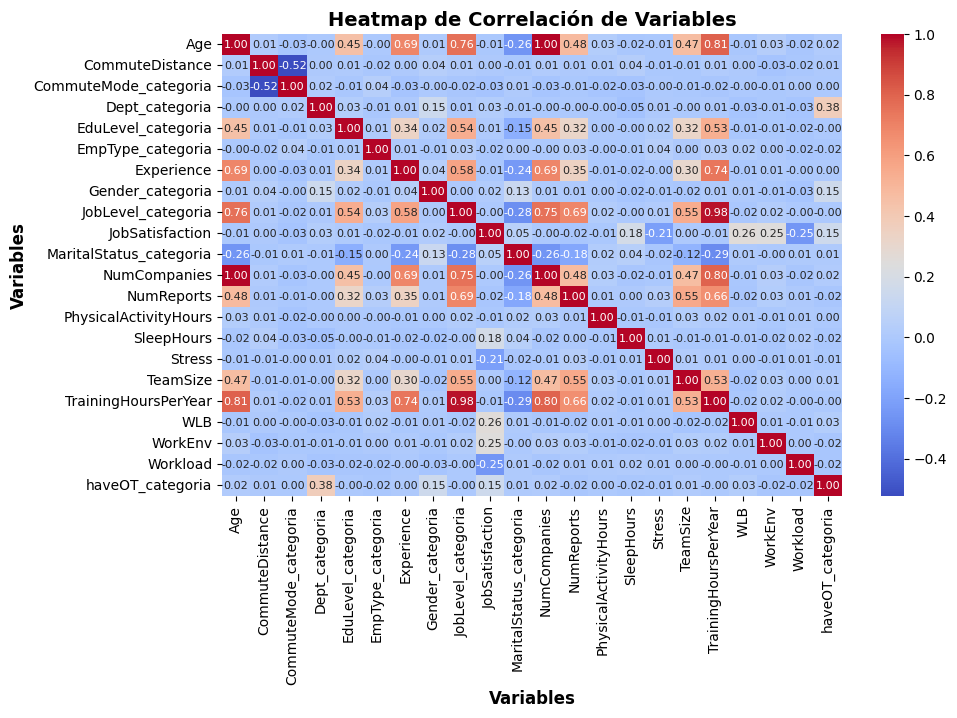

In [30]:
# Crear un heatmap 
plt.figure(figsize=(10, 6))
sns.heatmap(df_solocategoricos2.corr(), annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 8})

# Configurar los títulos y etiquetas
plt.title('Heatmap de Correlación de Variables', fontsize=14, fontweight='bold')
plt.xlabel('Variables', fontsize=12, fontweight='bold')
plt.ylabel('Variables', fontsize=12, fontweight='bold')
# Guardar el gráfico como una imagen
plt.savefig('graficos/Grafico6 - Heatmap completo', bbox_inches='tight')
# Mostrar el heatmap
plt.show()

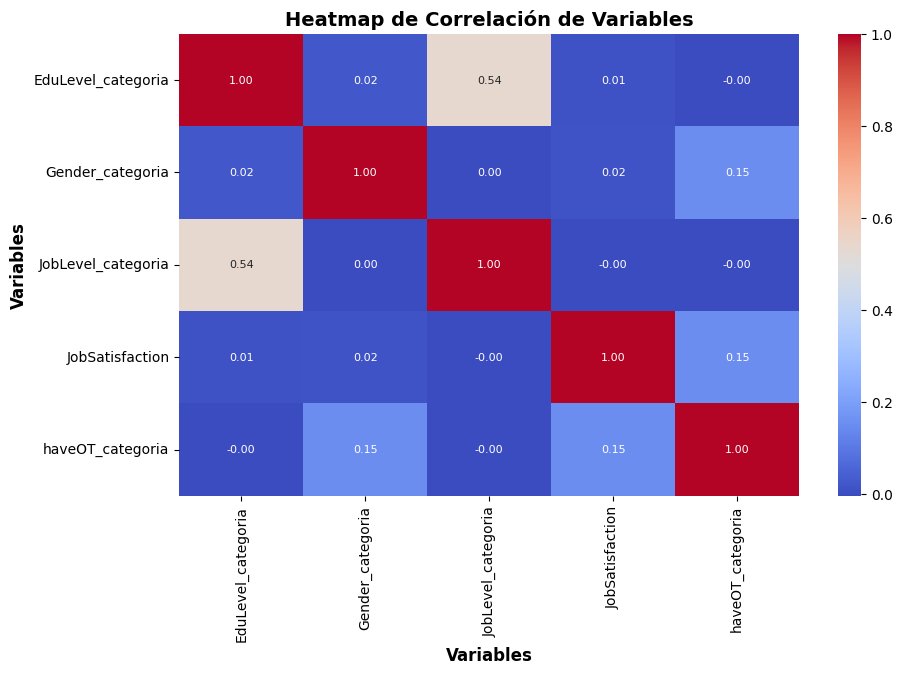

In [31]:
## Crear Headmap resumido para mejor visualización
# Crear df temporal con las varibles de interes para las hipótesis
df_temp = df_solocategoricos2[
    ['EduLevel_categoria', 'Gender_categoria', 'JobLevel_categoria', 'JobSatisfaction', 'haveOT_categoria']
]

# Crear un heatmap 
plt.figure(figsize=(10, 6))
sns.heatmap(df_temp.corr(), annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 8})

# Configurar los títulos y etiquetas
plt.title('Heatmap de Correlación de Variables', fontsize=14, fontweight='bold')
plt.xlabel('Variables', fontsize=12, fontweight='bold')
plt.ylabel('Variables', fontsize=12, fontweight='bold')
# Guardar el gráfico como una imagen
plt.savefig('graficos/Grafico7 - Heatmap reducido', bbox_inches='tight')
# Mostrar el heatmap
plt.show()

# Conclusiones análisis exploratorio

* Hipótesis a, Mientras mayor es el nivel de estudios, mayor es el nivel de trabajo que tiene (JobLevel): Verdadero, a mayores estudios hay puestos más altos.
* Hipótesis b, Por políticas de igualdad de género, la diferencia entre el nivel de satisfacción entre hombres y mujeres debe ser menor a 0.5 puntos: Verdadero, se comprobó que no hay relación de genero con satisfacción laboral y la diferencia máxima entre generos es de 0.053 puntos.
* Hipótesis c, Los trabajos de mayor rango (JobLevel: Senior y Lider) tienen más sobretiempo en promedio: Falso, el sobre tiempo lo toma al rededor del 65 a 70% de empleados, sin importar su nivel.

# Machine Learning

## División train - test

In [32]:
# Elimino EmpID por ser ID
df_sinID = df.drop(columns=['EmpID'])

# Se dividirá en 80% train y 20% test
df_train, df_test = train_test_split(df_sinID, test_size=0.20, train_size=0.80, random_state=42) #random_state=42 es el seed comúm para su uso.

In [33]:
porc_train = len(df_train)/len(df)*100
porc_test = len(df_test)/len(df)*100
# Redondeados
porc_train = int(round(porc_train,0))
porc_test = int(round(porc_test,0))

#imprimir porcentajes
print(f' df_train tiene {len(df_train)} datos igual al {porc_train}%')
print(f' df_test tiene {len(df_test)} datos igual al {porc_test}%')

 df_train tiene 2420 datos igual al 80%
 df_test tiene 605 datos igual al 20%


In [34]:
# Verifico que todos los valores categoricos tengan su codificación númerica.
print(df_train.dtypes)

Gender                      object
Age                          int64
CommuteDistance              int64
CommuteMode                 object
CommuteMode_categoria        int64
Dept                        object
Dept_categoria               int64
EduLevel                    object
EduLevel_categoria           int64
EmpType                     object
EmpType_categoria            int64
Experience                   int64
Gender_categoria             int64
JobLevel                    object
JobLevel_categoria           int64
JobSatisfaction              int64
MaritalStatus               object
MaritalStatus_categoria      int64
NumCompanies                 int64
NumReports                   int64
PhysicalActivityHours      float64
SleepHours                 float64
Stress                       int64
TeamSize                     int64
TrainingHoursPerYear       float64
WLB                          int64
WorkEnv                      int64
Workload                     int64
haveOT              

## K-meas

### Uso de variables númericas

In [35]:
# Como k-means solo funciona con variables númericas, elimino las vaviables object y booleanos.
# Crear una copia del DataFrame
df_train_categoricos = df_train.copy()

# Identificar las columnas que contienen valores numéricos
numeric_columns = df_train_categoricos.select_dtypes(include=['number']).columns

# Eliminar columnas que no contienen valores numéricos
df_train_categoricos = df_train_categoricos[numeric_columns]

print(df_train_categoricos.dtypes)

Age                          int64
CommuteDistance              int64
CommuteMode_categoria        int64
Dept_categoria               int64
EduLevel_categoria           int64
EmpType_categoria            int64
Experience                   int64
Gender_categoria             int64
JobLevel_categoria           int64
JobSatisfaction              int64
MaritalStatus_categoria      int64
NumCompanies                 int64
NumReports                   int64
PhysicalActivityHours      float64
SleepHours                 float64
Stress                       int64
TeamSize                     int64
TrainingHoursPerYear       float64
WLB                          int64
WorkEnv                      int64
Workload                     int64
haveOT_categoria             int64
dtype: object


### Escalado

Verifico las distribuciones para identificar que escalado usar.

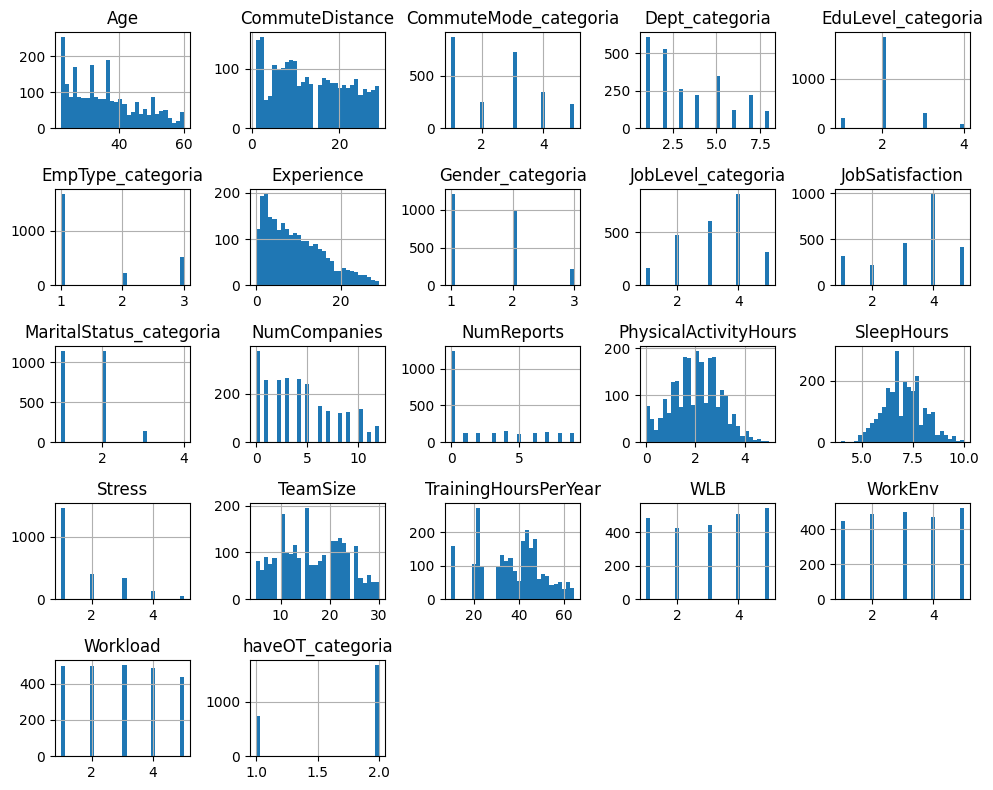

In [36]:
# Dibujar histogramas de cada columna
df_train_categoricos.hist(bins=30, figsize=(10, 8))
plt.tight_layout()
# Guardar el gráfico como una imagen
plt.savefig('graficos/Grafico8 - histogramas', bbox_inches='tight')
plt.show()

In [37]:
print(df_train_categoricos.describe())

               Age  CommuteDistance  CommuteMode_categoria  Dept_categoria  \
count  2420.000000      2420.000000            2420.000000     2420.000000   
mean     35.738430        13.518182               2.513223        3.410744   
std      10.191905         8.389352               1.349380        2.195275   
min      22.000000         1.000000               1.000000        1.000000   
25%      27.000000         6.750000               1.000000        1.000000   
50%      34.000000        13.000000               3.000000        3.000000   
75%      43.000000        21.000000               3.000000        5.000000   
max      60.000000        29.000000               5.000000        8.000000   

       EduLevel_categoria  EmpType_categoria   Experience  Gender_categoria  \
count          2420.00000        2420.000000  2420.000000       2420.000000   
mean              2.11157           1.519008     9.119008          1.586364   
std               0.57647           0.819897     7.046169   

Utilizaré el método minmax debido a que no todas las categorias tienen distribución normal

In [38]:
# Lista de columnas que deseas escalar
columnas_a_escalar = [
    'Age',
    'CommuteDistance',
    'Experience',
    'Gender_categoria',
    'JobLevel_categoria',
    'JobSatisfaction',
    'NumCompanies',
    'NumReports',
    'PhysicalActivityHours',
    'SleepHours',
    'Stress',
    'TeamSize',
    'TrainingHoursPerYear',
    'WLB',
    'WorkEnv',
    'Workload'
]

# Inicializamos el escalador
scaler = MinMaxScaler()

# Creo copia para escalar
df_train_escalado = df_train_categoricos

# Escalamos las columnas seleccionadas y las reemplazamos en el DataFrame original
df_train_escalado[columnas_a_escalar] = scaler.fit_transform(df_train_escalado[columnas_a_escalar])

# Mostrar el DataFrame escalado
df_train_escalado.head()


,Age,CommuteDistance,CommuteMode_categoria,Dept_categoria,EduLevel_categoria,EmpType_categoria,Experience,Gender_categoria,JobLevel_categoria,JobSatisfaction,...,NumReports,PhysicalActivityHours,SleepHours,Stress,TeamSize,TrainingHoursPerYear,WLB,WorkEnv,Workload,haveOT_categoria
1672,0.368421,0.607143,1,2,2,1,0.482759,0.0,0.75,1.00,...,0.777778,0.50,0.550000,0.0,0.40,0.678899,0.50,0.75,0.0,2
1244,0.342105,0.535714,2,5,2,1,0.275862,0.5,0.75,0.00,...,0.333333,0.44,0.500000,1.0,0.44,0.623853,0.00,0.75,0.5,2
1351,0.342105,0.428571,3,1,2,2,0.448276,0.0,0.50,0.00,...,0.000000,0.32,0.283333,0.0,0.24,0.486239,0.50,1.00,1.0,1
415,0.473684,0.000000,5,5,2,1,0.620690,0.0,0.50,0.75,...,0.000000,0.38,0.800000,0.0,0.28,0.532110,0.75,0.25,0.5,2
1190,0.078947,0.571429,3,3,2,1,0.103448,0.0,0.50,0.00,...,0.000000,0.24,0.483333,0.0,0.36,0.394495,0.00,0.25,0.5,2


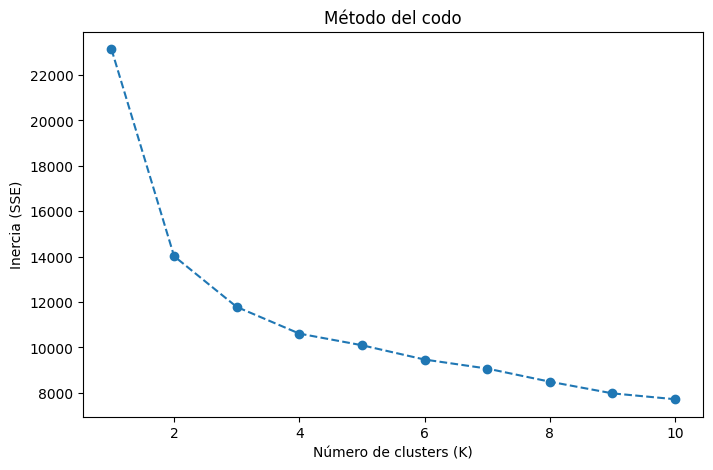

In [39]:
# Lista para almacenar la inercia (SSE) para diferentes valores de K
inertia = []

# Probar diferentes valores de K (por ejemplo, de 1 a 10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_train_categoricos)  # Aplica k-means al conjunto de entrenamiento
    inertia.append(kmeans.inertia_)

# Graficar los resultados del método del codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Método del codo')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Inercia (SSE)')
# Guardar el gráfico como una imagen
plt.savefig('graficos/Grafico9 - metodo del codo', bbox_inches='tight')
plt.show()


Identifico el número ótimo de clusters = 2

### Clustering

In [40]:
# Nro óptimo de clusters
num_clusters = 2 

# Inicializa el modelo KMeans con el número de clústeres
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Ajusta el modelo a los datos escalados
kmeans.fit(df_train_categoricos)

# Obtener las etiquetas de los clústeres
etiquetas = kmeans.labels_

# Agregar las etiquetas al DataFrame original
df_train_categoricos['Cluster'] = etiquetas

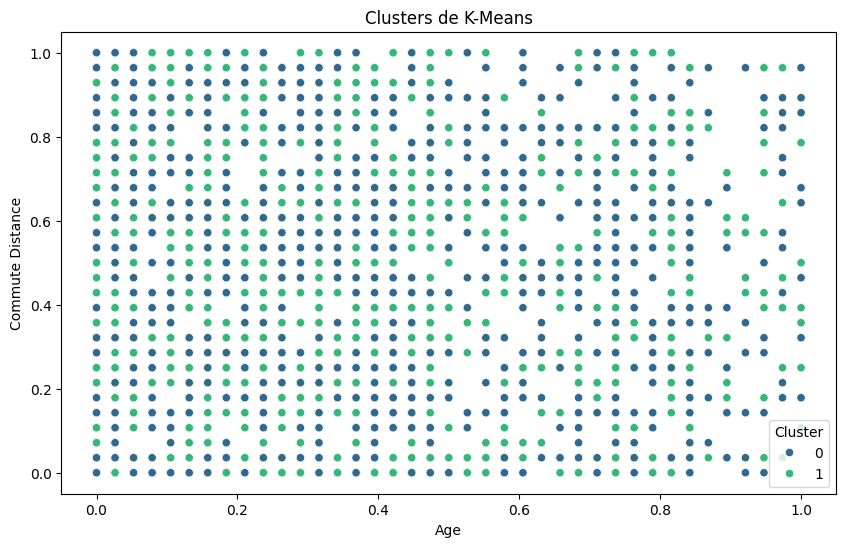

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersión (solo si tienes 2 o 3 características)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_train_categoricos, x='Age', y='CommuteDistance', hue='Cluster', palette='viridis')
plt.title('Clusters de K-Means')
plt.xlabel('Age')
plt.ylabel('Commute Distance')
# Guardar el gráfico como una imagen
plt.savefig('graficos/Grafico10 - clusters kmeans', bbox_inches='tight')
plt.show()



Se visualiza que no se agrupan. Por lo cual el método k-means queda descartado (no es óptimo). <br>
En su lugar, trataré aprendizaje supervizado (lo cual puede ser mejor para variables categoricas).

## One-hot encoding y label encoding

### Limpieza df

Está técnica permite y trabaja bien con variables categoricas. Por tanto, dejaré las categoricas y eliminaré las categoricas codificadas.

In [42]:
df_clean = df.drop(columns=[
    'EmpID',
    'CommuteMode_categoria', 
    'Dept_categoria', 
    'EduLevel_categoria',
    'EmpType_categoria',
    'Gender_categoria',
    'JobLevel_categoria',
    'MaritalStatus_categoria',
    'haveOT_categoria'])

df_clean.head()

,Gender,Age,CommuteDistance,CommuteMode,Dept,EduLevel,EmpType,Experience,JobLevel,JobSatisfaction,...,NumReports,PhysicalActivityHours,SleepHours,Stress,TeamSize,TrainingHoursPerYear,WLB,WorkEnv,Workload,haveOT
0,Masculino,32,20,Carro,TI,2 - Bachiller,Full-Time,7,3 - Semi-senior,5,...,0,2.5,7.6,1,12,33.5,1,1,2,True
1,Femenino,34,15,Carro,Finanzas,2 - Bachiller,Full-Time,12,3 - Semi-senior,5,...,0,1.8,7.9,2,11,36.0,1,1,2,False
2,Femenino,23,17,Moto,Marketing,2 - Bachiller,Full-Time,1,1 - Practicante,5,...,0,2.1,6.5,4,30,10.5,2,4,5,True
3,Femenino,29,13,Transporte Público,TI,2 - Bachiller,Contrato,6,2 - Junior,5,...,0,1.9,7.5,1,9,23.0,2,2,3,True
4,Otros,23,20,Carro,Ventas,2 - Bachiller,Part-Time,1,2 - Junior,5,...,0,3.7,4.9,1,7,20.5,3,1,2,False


In [43]:
print(df_clean.dtypes)

Gender                    object
Age                        int64
CommuteDistance            int64
CommuteMode               object
Dept                      object
EduLevel                  object
EmpType                   object
Experience                 int64
JobLevel                  object
JobSatisfaction            int64
MaritalStatus             object
NumCompanies               int64
NumReports                 int64
PhysicalActivityHours    float64
SleepHours               float64
Stress                     int64
TeamSize                   int64
TrainingHoursPerYear     float64
WLB                        int64
WorkEnv                    int64
Workload                   int64
haveOT                      bool
dtype: object


### División para one-hot encoding y label encoding

A las variables categoricas que indican nivel les aplicaré label encoding (edu_level, job_level)

In [44]:
# Mapeo para categóricas con orden. Como se clasificarón con su nro de nivel correspondiente basta con extraer el número al inicio de la variable.
# Como algunos modelos de python esperan indice 0, restaré 1 a cada valor para respetar dicho indice.
df_clean['EduLevel'] = df_clean['EduLevel'].str.split(' - ').str[0].astype(int) - 1
df_clean['JobLevel'] = df_clean['JobLevel'].str.split(' - ').str[0].astype(int) - 1

# Aplicar One-Hot Encoding a las variables sin orden
df_clean = pd.get_dummies(df_clean, columns=['Gender', 'CommuteMode', 'Dept', 'EmpType', 'MaritalStatus', 'haveOT'])

# Definir la variable objetivo (target) y las características (features)
X = df_clean.drop('JobLevel', axis=1)  # Características
y = df_clean['JobLevel']  # Variable objetivo

# Dividir el conjunto de datos en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar el tamaño de los conjuntos
print(f'Tamaño de X_train: {X_train.shape}')
print(f'Tamaño de X_test: {X_test.shape}')
print(f'Tamaño de y_train: {y_train.shape}')
print(f'Tamaño de y_test: {y_test.shape}')

Tamaño de X_train: (2420, 40)
Tamaño de X_test: (605, 40)
Tamaño de y_train: (2420,)
Tamaño de y_test: (605,)


In [45]:
# Crear un escalador
scaler = MinMaxScaler()

# Ajustar el escalador solo con los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba usando el escalador ajustado en el conjunto de entrenamiento
X_test_scaled = scaler.transform(X_test)

Una vez divididos correctamente, se procede a implementar las herramientas de machine Learning.

## Regresión Logística

In [46]:
# Entrenar el modelo de Regresión Logística
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Predecir y evaluar
y_pred = logreg.predict(X_test_scaled)

# Evaluación: Métricas (Precisión y error cuadrático medio)
accuracy_regresion_logistica = accuracy_score(y_test, y_pred)
mse_regresion_logistica = mean_squared_error(y_test, y_pred)

print(f'Precisión del modelo: {accuracy_regresion_logistica:.4f}')
print(f'Error cuadrático medio: {mse_regresion_logistica:.4f}')

Precisión del modelo: 0.9769
Error cuadrático medio: 0.0231



Regresión Logística - Matriz de confusión para JobLevel = 0:
Verdaderos Positivos (TP): 43
Verdaderos Negativos (TN): 562
Falsos Positivos (FP): 0
Falsos Negativos (FN): 0


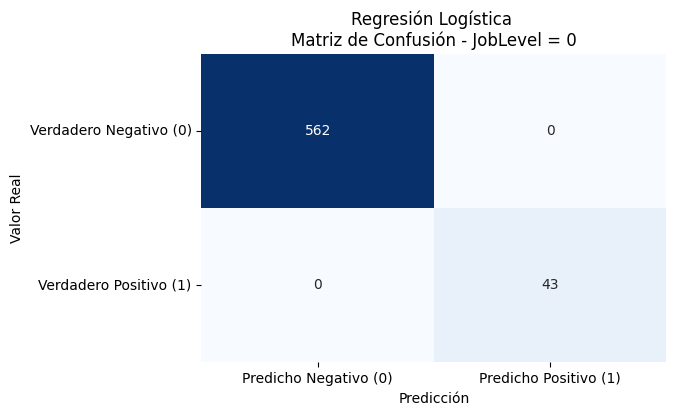


Regresión Logística - Matriz de confusión para JobLevel = 1:
Verdaderos Positivos (TP): 123
Verdaderos Negativos (TN): 481
Falsos Positivos (FP): 0
Falsos Negativos (FN): 1


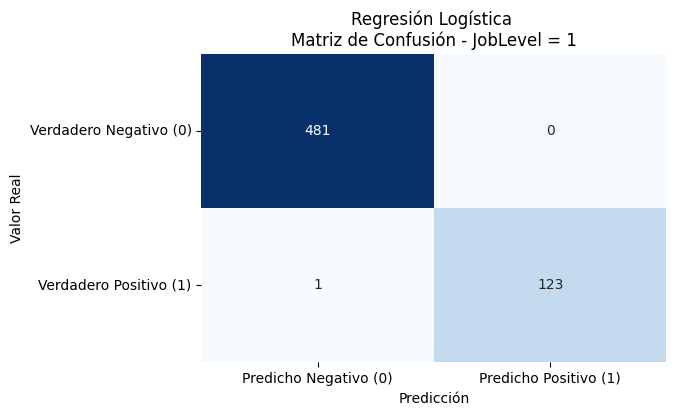


Regresión Logística - Matriz de confusión para JobLevel = 2:
Verdaderos Positivos (TP): 161
Verdaderos Negativos (TN): 435
Falsos Positivos (FP): 9
Falsos Negativos (FN): 0


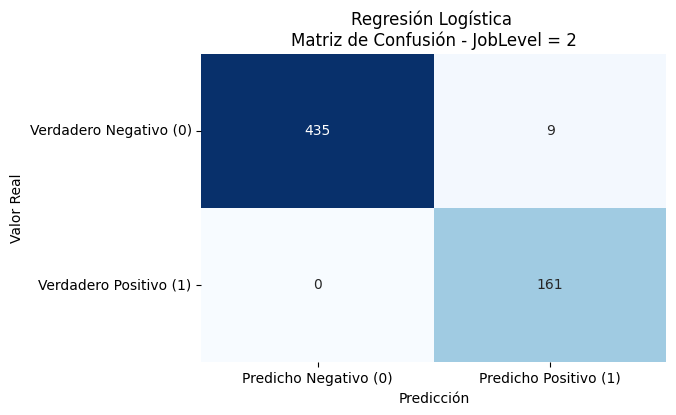


Regresión Logística - Matriz de confusión para JobLevel = 3:
Verdaderos Positivos (TP): 194
Verdaderos Negativos (TN): 398
Falsos Positivos (FP): 3
Falsos Negativos (FN): 10


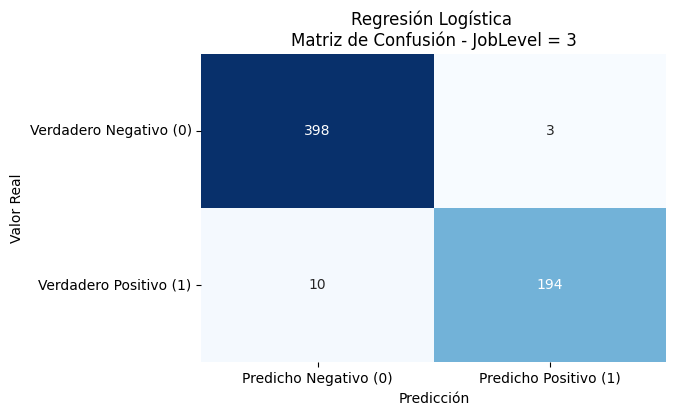


Regresión Logística - Matriz de confusión para JobLevel = 4:
Verdaderos Positivos (TP): 70
Verdaderos Negativos (TN): 530
Falsos Positivos (FP): 2
Falsos Negativos (FN): 3


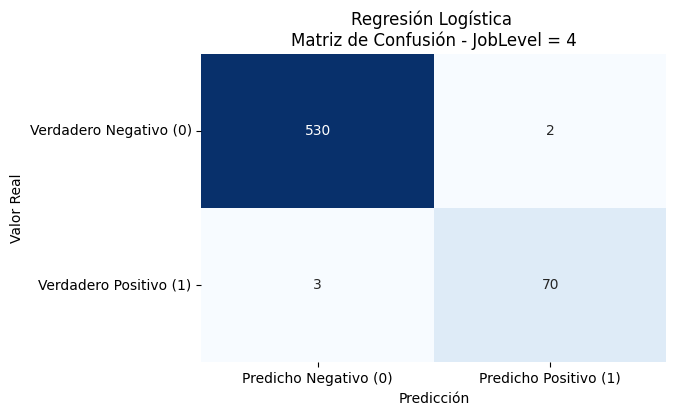

In [47]:
# Iterar sobre cada nivel de JobLevel
for nivel in np.unique(y_test):
    print(f"\nRegresión Logística - Matriz de confusión para JobLevel = {nivel}:")
    
    # Convertir el problema en binario: 1 si es el nivel actual, 0 en caso contrario
    y_test_binario = (y_test == nivel).astype(int)
    y_pred_binario = (y_pred == nivel).astype(int)
    
    # Obtener la matriz de confusión para el nivel actual
    conf_matrix = confusion_matrix(y_test_binario, y_pred_binario)
    
    # Extraer TN, FP, FN, TP
    if conf_matrix.shape == (2, 2):
        TN, FP, FN, TP = conf_matrix.ravel()
        
        # Mostrar los valores de TP, TN, FP y FN
        print(f'Verdaderos Positivos (TP): {TP}')
        print(f'Verdaderos Negativos (TN): {TN}')
        print(f'Falsos Positivos (FP): {FP}')
        print(f'Falsos Negativos (FN): {FN}')
        
        # Graficar la matriz de confusión
        conf_matrix_df = pd.DataFrame(conf_matrix, index=['Verdadero Negativo (0)', 'Verdadero Positivo (1)'], 
                                      columns=['Predicho Negativo (0)', 'Predicho Positivo (1)'])
        
        plt.figure(figsize=(6, 4))
        sns.heatmap(conf_matrix_df, annot=True, fmt='g', cmap="Blues", cbar=False)
        plt.title(f'Regresión Logística \nMatriz de Confusión - JobLevel = {nivel}')
        plt.xlabel('Predicción')
        plt.ylabel('Valor Real')
        # Guardar el gráfico como una imagen
        plt.savefig(f'graficos/Grafico11 - Regresion logistica - Matriz de confusion JobLevel {nivel}', bbox_inches='tight')
        plt.show()

    else:
        print(f"La matriz de confusión para JobLevel {nivel} no es válida para el problema binario.")



## Árboles de desición

In [48]:
# Entrenar el modelo de Árbol de Decisión
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

# Predecir y evaluar
y_pred = clf.predict(X_test_scaled)

# Evaluación: Precisión y error cuadrático medio
accuracy_arboles_decision = accuracy_score(y_test, y_pred)
mse_arboles_decision = mean_squared_error(y_test, y_pred)

print(f'Precisión del modelo de Árbol de Decisión: {accuracy_arboles_decision:.4f}')
print(f'Error cuadrático medio: {mse_arboles_decision:.4f}')

Precisión del modelo de Árbol de Decisión: 0.9983
Error cuadrático medio: 0.0017


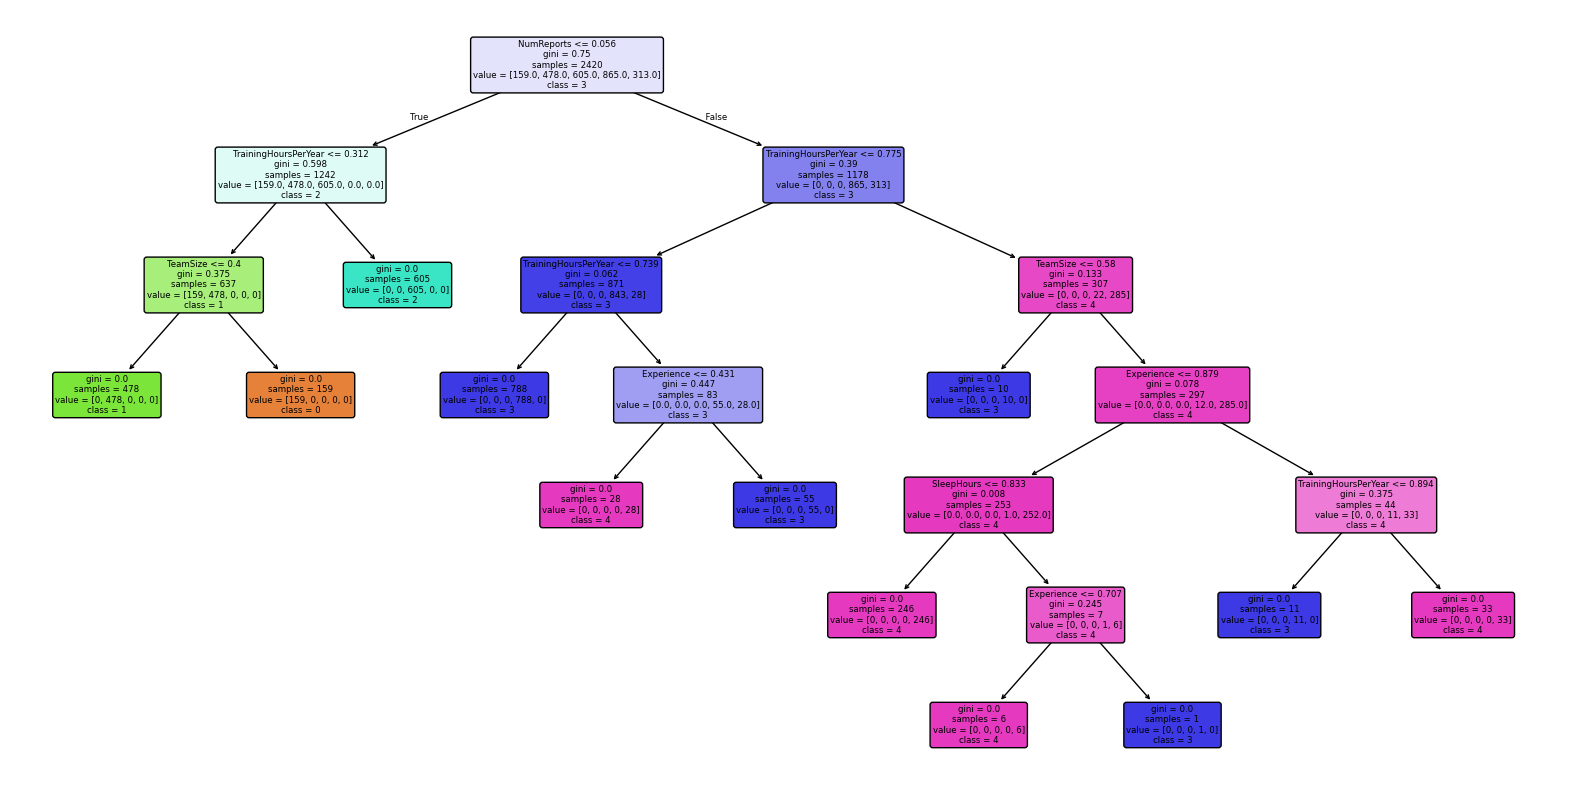

In [49]:
# Dibujar el árbol
plt.figure(figsize=(20, 10))  # Ajustar el tamaño del gráfico
plot_tree(clf, filled=True, feature_names=X.columns, class_names=[str(i) for i in clf.classes_], rounded=True)
# Guardar el gráfico como una imagen
plt.savefig('graficos/Grafico12 - Arboles de decision', bbox_inches='tight')
plt.show()


Árboles de desición - Matriz de confusión para JobLevel = 0:
Verdaderos Positivos (TP): 43
Verdaderos Negativos (TN): 562
Falsos Positivos (FP): 0
Falsos Negativos (FN): 0


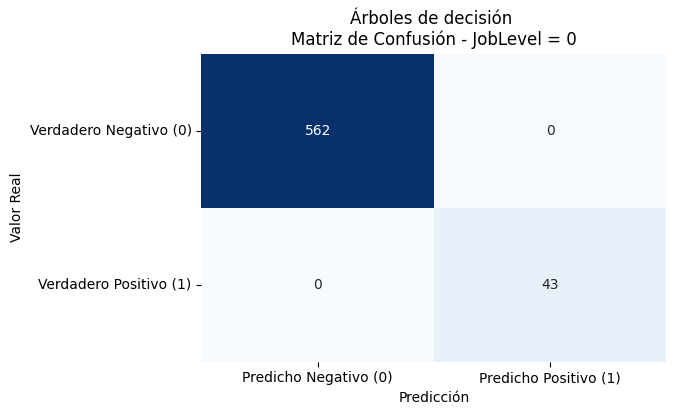


Árboles de desición - Matriz de confusión para JobLevel = 1:
Verdaderos Positivos (TP): 124
Verdaderos Negativos (TN): 481
Falsos Positivos (FP): 0
Falsos Negativos (FN): 0


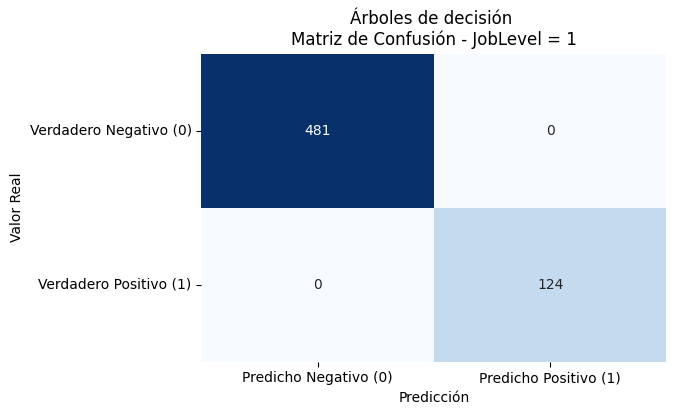


Árboles de desición - Matriz de confusión para JobLevel = 2:
Verdaderos Positivos (TP): 161
Verdaderos Negativos (TN): 444
Falsos Positivos (FP): 0
Falsos Negativos (FN): 0


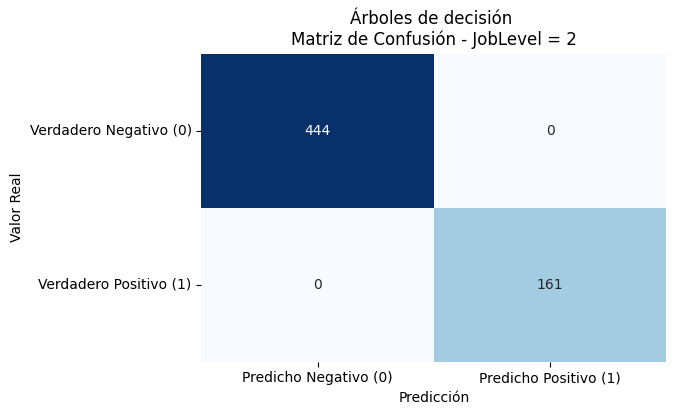


Árboles de desición - Matriz de confusión para JobLevel = 3:
Verdaderos Positivos (TP): 203
Verdaderos Negativos (TN): 401
Falsos Positivos (FP): 0
Falsos Negativos (FN): 1


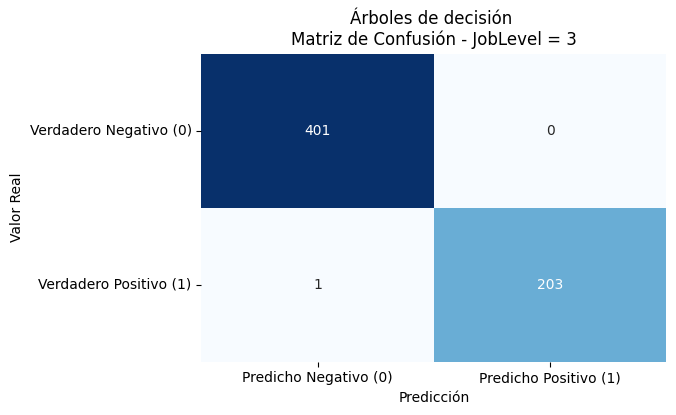


Árboles de desición - Matriz de confusión para JobLevel = 4:
Verdaderos Positivos (TP): 73
Verdaderos Negativos (TN): 531
Falsos Positivos (FP): 1
Falsos Negativos (FN): 0


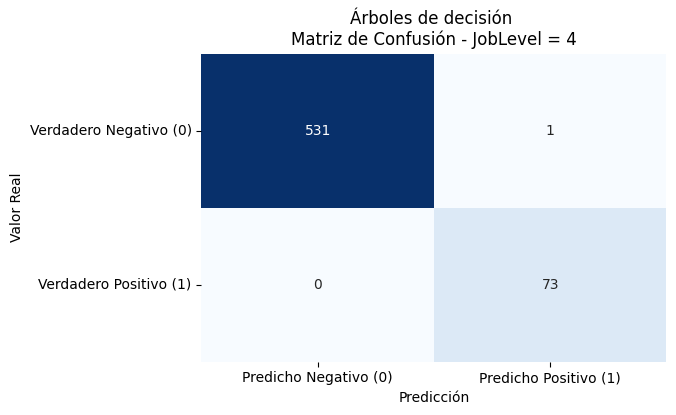

In [50]:
# Iterar sobre cada nivel de JobLevel
for nivel in np.unique(y_test):
    print(f"\nÁrboles de desición - Matriz de confusión para JobLevel = {nivel}:")
    
    # Convertir el problema en binario: 1 si es el nivel actual, 0 en caso contrario
    y_test_binario = (y_test == nivel).astype(int)
    y_pred_binario = (y_pred == nivel).astype(int)
    
    # Obtener la matriz de confusión para el nivel actual
    conf_matrix = confusion_matrix(y_test_binario, y_pred_binario)
    
    # Extraer TN, FP, FN, TP
    if conf_matrix.shape == (2, 2):
        TN, FP, FN, TP = conf_matrix.ravel()
        
        # Mostrar los valores de TP, TN, FP y FN
        print(f'Verdaderos Positivos (TP): {TP}')
        print(f'Verdaderos Negativos (TN): {TN}')
        print(f'Falsos Positivos (FP): {FP}')
        print(f'Falsos Negativos (FN): {FN}')
        
        # Graficar la matriz de confusión
        conf_matrix_df = pd.DataFrame(conf_matrix, index=['Verdadero Negativo (0)', 'Verdadero Positivo (1)'], 
                                      columns=['Predicho Negativo (0)', 'Predicho Positivo (1)'])
        
        plt.figure(figsize=(6, 4))
        sns.heatmap(conf_matrix_df, annot=True, fmt='g', cmap="Blues", cbar=False)
        plt.title(f'Árboles de decisión \nMatriz de Confusión - JobLevel = {nivel}')
        plt.xlabel('Predicción')
        plt.ylabel('Valor Real')
        # Guardar el gráfico como una imagen
        plt.savefig(f'graficos/Grafico13 - Arboles de desición - Matriz de confusion JobLevel {nivel}', bbox_inches='tight')
        plt.show()


    else:
        print(f"La matriz de confusión para JobLevel {nivel} no es válida para el problema binario.")


## Random forest

In [51]:
# Entrenar el modelo de Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_scaled, y_train)

# Predecir con el conjunto de test
y_pred = random_forest.predict(X_test_scaled)

# Evaluar el modelo: Precisión y Error Cuadrático Medio
accuracy_randomforest = accuracy_score(y_test, y_pred)
mse_randomforest = mean_squared_error(y_test, y_pred)

print(f'Precisión del modelo Random Forest: {accuracy_randomforest:.4f}')
print(f'Error cuadrático medio del modelo Random Forest: {mse_randomforest:.4f}')


Precisión del modelo Random Forest: 0.9950
Error cuadrático medio del modelo Random Forest: 0.0050


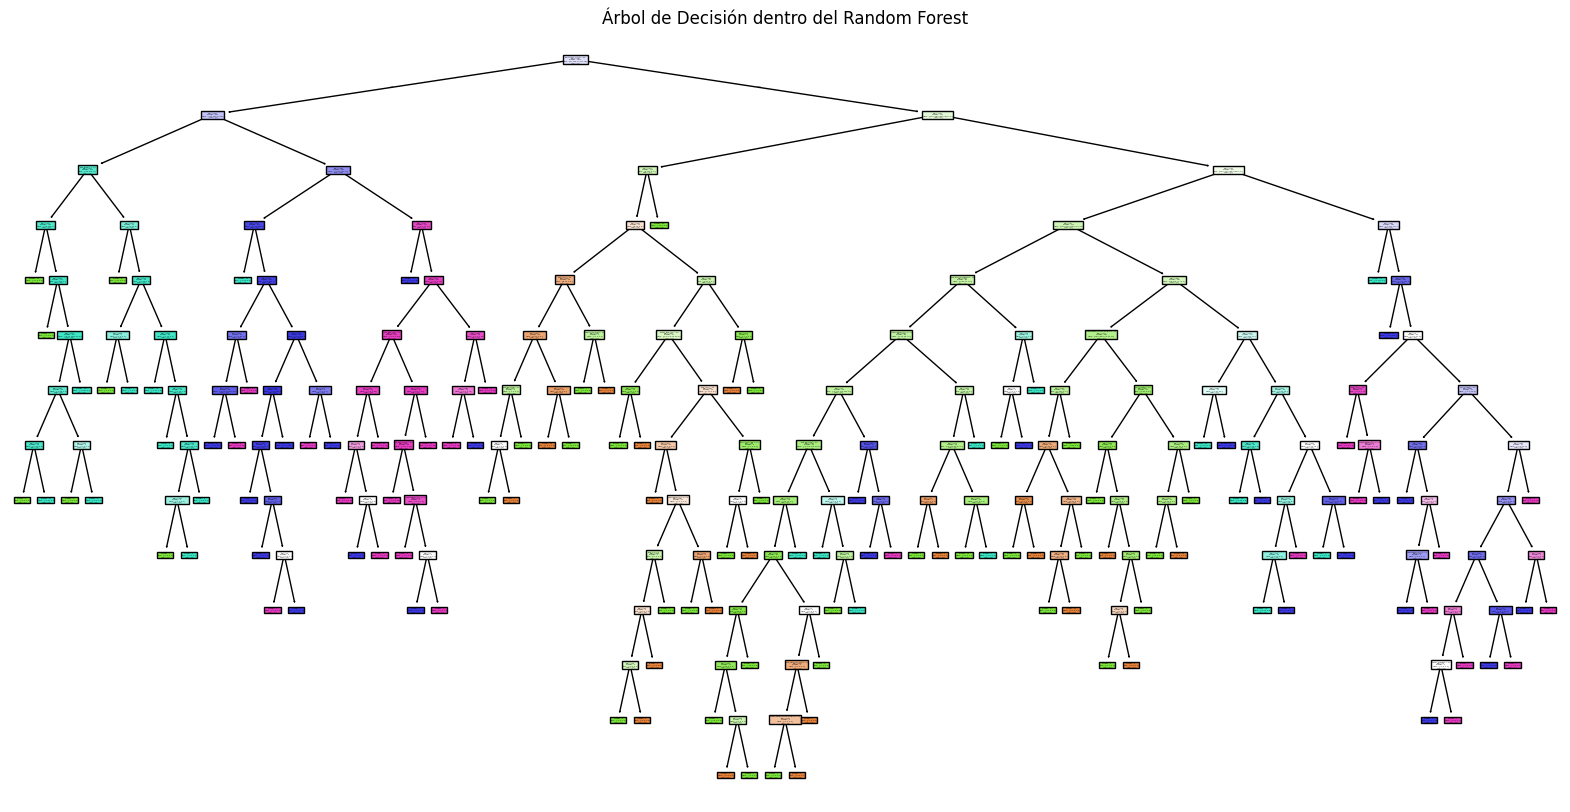

In [52]:
# Seleccionar uno de los árboles del Random Forest (por ejemplo, el primer árbol)
tree = random_forest.estimators_[0]

# Graficar el árbol seleccionado
plt.figure(figsize=(20, 10))  # Ajustar el tamaño de la figura
plot_tree(tree, filled=True, feature_names=X_train.columns, class_names=True)  # Asegúrate que X_train.columns existe
plt.title('Árbol de Decisión dentro del Random Forest')
# Guardar el gráfico como una imagen
plt.savefig('graficos/Grafico14 - Random forest', bbox_inches='tight')
plt.show()



Árboles de desición - Matriz de confusión para JobLevel = 0:
Verdaderos Positivos (TP): 43
Verdaderos Negativos (TN): 562
Falsos Positivos (FP): 0
Falsos Negativos (FN): 0


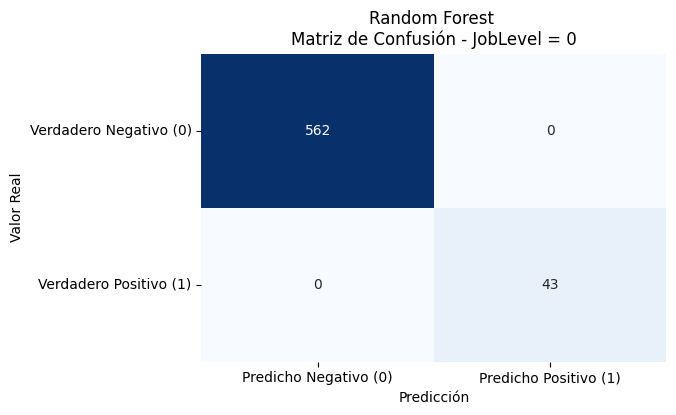


Árboles de desición - Matriz de confusión para JobLevel = 1:
Verdaderos Positivos (TP): 124
Verdaderos Negativos (TN): 481
Falsos Positivos (FP): 0
Falsos Negativos (FN): 0


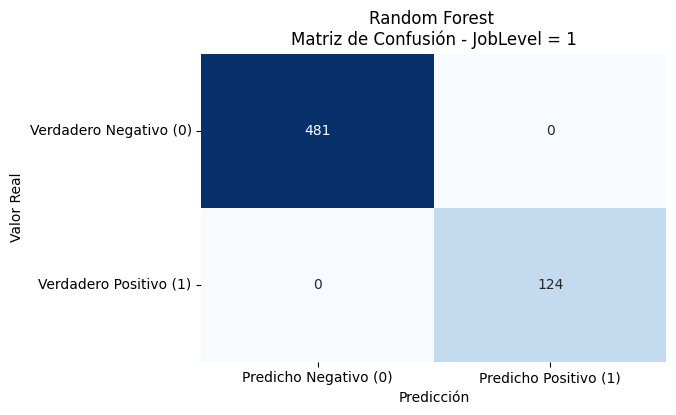


Árboles de desición - Matriz de confusión para JobLevel = 2:
Verdaderos Positivos (TP): 161
Verdaderos Negativos (TN): 444
Falsos Positivos (FP): 0
Falsos Negativos (FN): 0


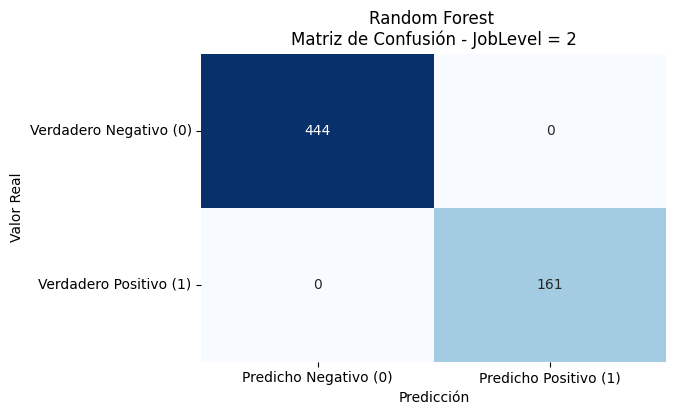


Árboles de desición - Matriz de confusión para JobLevel = 3:
Verdaderos Positivos (TP): 201
Verdaderos Negativos (TN): 401
Falsos Positivos (FP): 0
Falsos Negativos (FN): 3


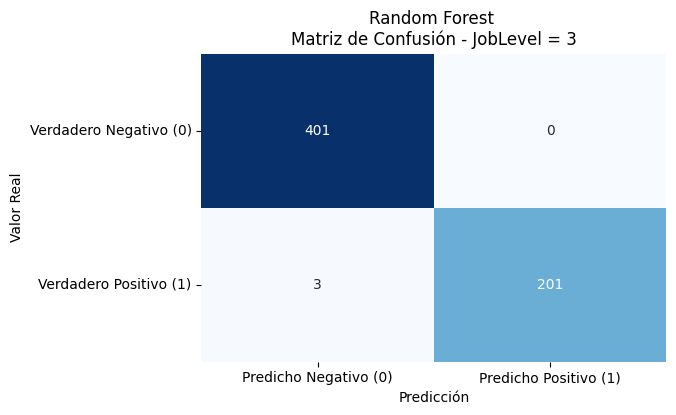


Árboles de desición - Matriz de confusión para JobLevel = 4:
Verdaderos Positivos (TP): 73
Verdaderos Negativos (TN): 529
Falsos Positivos (FP): 3
Falsos Negativos (FN): 0


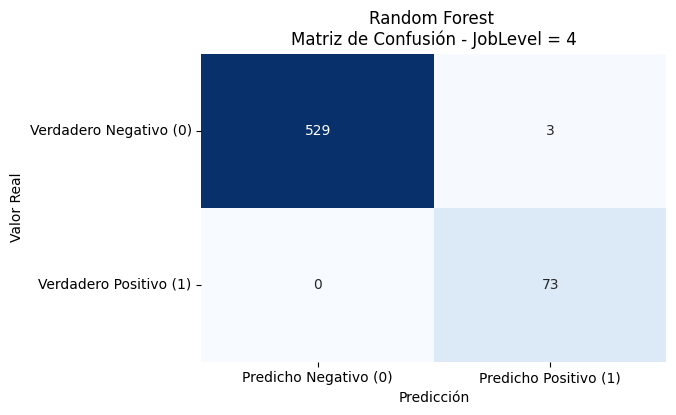

In [53]:
# Iterar sobre cada nivel de JobLevel
for nivel in np.unique(y_test):
    print(f"\nÁrboles de desición - Matriz de confusión para JobLevel = {nivel}:")
    
    # Convertir el problema en binario: 1 si es el nivel actual, 0 en caso contrario
    y_test_binario = (y_test == nivel).astype(int)
    y_pred_binario = (y_pred == nivel).astype(int)
    
    # Obtener la matriz de confusión para el nivel actual
    conf_matrix = confusion_matrix(y_test_binario, y_pred_binario)
    
    # Extraer TN, FP, FN, TP
    if conf_matrix.shape == (2, 2):
        TN, FP, FN, TP = conf_matrix.ravel()
        
        # Mostrar los valores de TP, TN, FP y FN
        print(f'Verdaderos Positivos (TP): {TP}')
        print(f'Verdaderos Negativos (TN): {TN}')
        print(f'Falsos Positivos (FP): {FP}')
        print(f'Falsos Negativos (FN): {FN}')
        
        # Graficar la matriz de confusión
        conf_matrix_df = pd.DataFrame(conf_matrix, index=['Verdadero Negativo (0)', 'Verdadero Positivo (1)'], 
                                      columns=['Predicho Negativo (0)', 'Predicho Positivo (1)'])
        
        plt.figure(figsize=(6, 4))
        sns.heatmap(conf_matrix_df, annot=True, fmt='g', cmap="Blues", cbar=False)
        plt.title(f'Random Forest \nMatriz de Confusión - JobLevel = {nivel}')
        plt.xlabel('Predicción')
        plt.ylabel('Valor Real')
        # Guardar el gráfico como una imagen
        plt.savefig(f'graficos/Grafico15 - Random forest - Matriz de confusion JobLevel {nivel}', bbox_inches='tight')
        plt.show()


    else:
        print(f"La matriz de confusión para JobLevel {nivel} no es válida para el problema binario.")


## XGBoost

In [54]:
# Crear el modelo de XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)

# Entrenar el modelo de XGBoost
xgb_model.fit(X_train_scaled, y_train)

# Predecir con el conjunto de test
y_pred = xgb_model.predict(X_test_scaled)

# Evaluar el modelo: Precisión y Error Cuadrático Medio
accuracy_xgb = accuracy_score(y_test, y_pred)
mse_xgb = mean_squared_error(y_test, y_pred)

print(f'Precisión del modelo XGBoost: {accuracy_xgb:.4f}')
print(f'Error cuadrático medio del modelo XGBoost: {mse_xgb:.4f}')

Precisión del modelo XGBoost: 1.0000
Error cuadrático medio del modelo XGBoost: 0.0000



XGBoost - Matriz de confusión para JobLevel = 0:
Verdaderos Positivos (TP): 43
Verdaderos Negativos (TN): 562
Falsos Positivos (FP): 0
Falsos Negativos (FN): 0


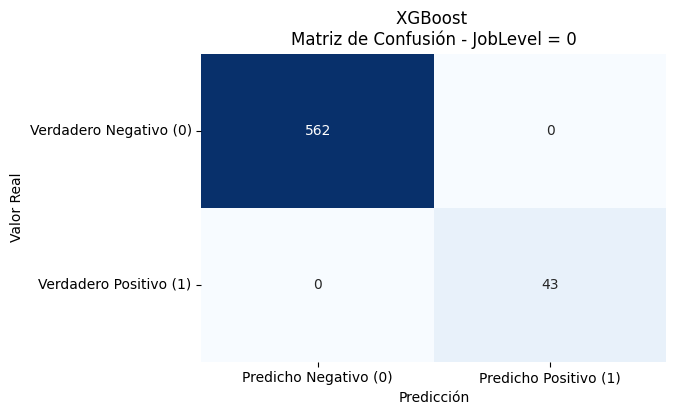


XGBoost - Matriz de confusión para JobLevel = 1:
Verdaderos Positivos (TP): 124
Verdaderos Negativos (TN): 481
Falsos Positivos (FP): 0
Falsos Negativos (FN): 0


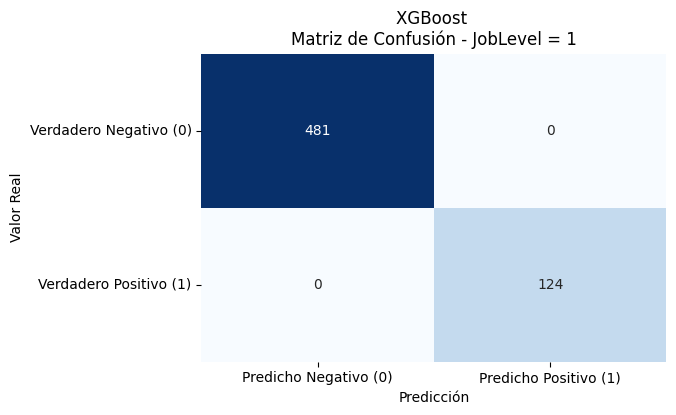


XGBoost - Matriz de confusión para JobLevel = 2:
Verdaderos Positivos (TP): 161
Verdaderos Negativos (TN): 444
Falsos Positivos (FP): 0
Falsos Negativos (FN): 0


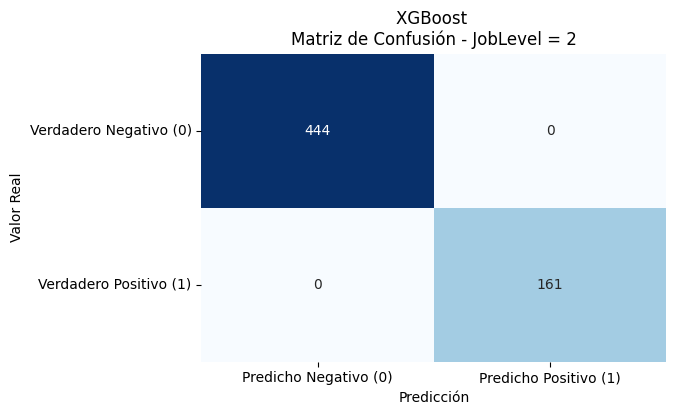


XGBoost - Matriz de confusión para JobLevel = 3:
Verdaderos Positivos (TP): 204
Verdaderos Negativos (TN): 401
Falsos Positivos (FP): 0
Falsos Negativos (FN): 0


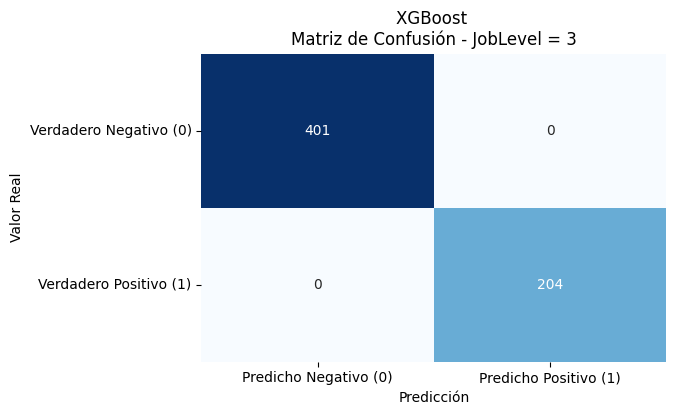


XGBoost - Matriz de confusión para JobLevel = 4:
Verdaderos Positivos (TP): 73
Verdaderos Negativos (TN): 532
Falsos Positivos (FP): 0
Falsos Negativos (FN): 0


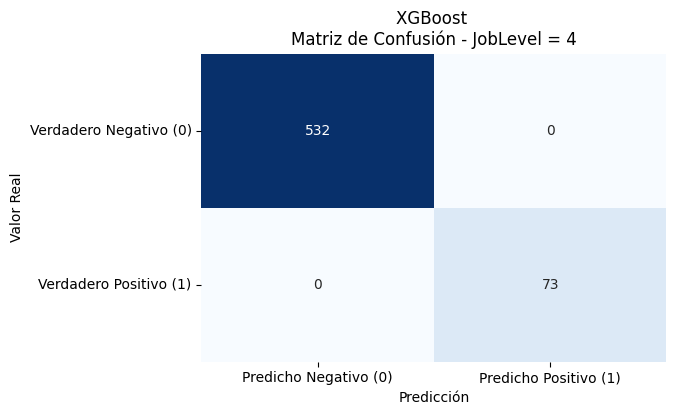

In [55]:
# Iterar sobre cada nivel de JobLevel
for nivel in np.unique(y_test):
    print(f"\nXGBoost - Matriz de confusión para JobLevel = {nivel}:")
    
    # Convertir el problema en binario: 1 si es el nivel actual, 0 en caso contrario
    y_test_binario = (y_test == nivel).astype(int)
    y_pred_binario = (y_pred == nivel).astype(int)
    
    # Obtener la matriz de confusión para el nivel actual
    conf_matrix = confusion_matrix(y_test_binario, y_pred_binario)
    
    # Extraer TN, FP, FN, TP
    if conf_matrix.shape == (2, 2):
        TN, FP, FN, TP = conf_matrix.ravel()
        
        # Mostrar los valores de TP, TN, FP y FN
        print(f'Verdaderos Positivos (TP): {TP}')
        print(f'Verdaderos Negativos (TN): {TN}')
        print(f'Falsos Positivos (FP): {FP}')
        print(f'Falsos Negativos (FN): {FN}')
        
        # Graficar la matriz de confusión
        conf_matrix_df = pd.DataFrame(conf_matrix, index=['Verdadero Negativo (0)', 'Verdadero Positivo (1)'], 
                                      columns=['Predicho Negativo (0)', 'Predicho Positivo (1)'])
        
        plt.figure(figsize=(6, 4))
        sns.heatmap(conf_matrix_df, annot=True, fmt='g', cmap="Blues", cbar=False)
        plt.title(f'XGBoost \nMatriz de Confusión - JobLevel = {nivel}')
        plt.xlabel('Predicción')
        plt.ylabel('Valor Real')
        # Guardar el gráfico como una imagen
        plt.savefig(f'graficos/Grafico16 - XGBoost - Matriz de confusion JobLevel {nivel}', bbox_inches='tight')
        plt.show()


    else:
        print(f"La matriz de confusión para JobLevel {nivel} no es válida para el problema binario.")

## Vecinos cercanos (KNN)

In [56]:
# Definir el modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  

# Entrenar el modelo con los datos de entrenamiento
knn_model.fit(X_train_scaled, y_train)

# Predecir los valores del conjunto de prueba
y_pred = knn_model.predict(X_test_scaled)

# Evaluar el modelo: Precisión y Error Cuadrático Medio
accuracy_knn = accuracy_score(y_test, y_pred)
mse_knn = mean_squared_error(y_test, y_pred)

print(f'Precisión del modelo KNN: {accuracy_knn:.4f}')
print(f'Error cuadrático medio del modelo KNN: {mse_knn:.4f}')

# Reporte de clasificación
print("\nReporte de clasificación para KNN:")
print(classification_report(y_test, y_pred))


Precisión del modelo KNN: 0.5653
Error cuadrático medio del modelo KNN: 0.6281

Reporte de clasificación para KNN:
              precision    recall  f1-score   support

           0       0.63      0.44      0.52        43
           1       0.54      0.77      0.64       124
           2       0.53      0.49      0.51       161
           3       0.59      0.63      0.61       204
           4       0.61      0.26      0.37        73

    accuracy                           0.57       605
   macro avg       0.58      0.52      0.53       605
weighted avg       0.57      0.57      0.55       605




KNN - Matriz de confusión para JobLevel = 0:
Verdaderos Positivos (TP): 19
Verdaderos Negativos (TN): 551
Falsos Positivos (FP): 11
Falsos Negativos (FN): 24


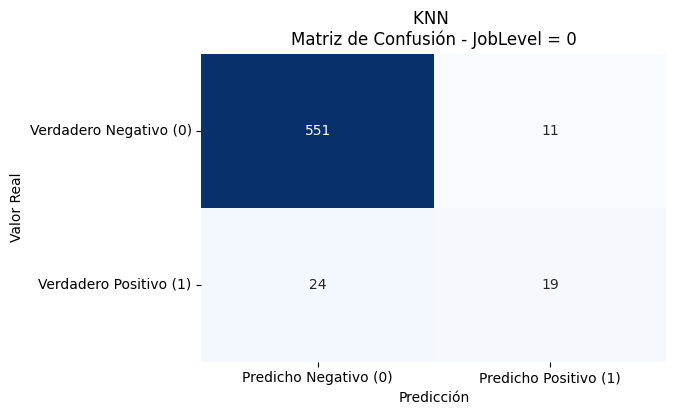


KNN - Matriz de confusión para JobLevel = 1:
Verdaderos Positivos (TP): 96
Verdaderos Negativos (TN): 400
Falsos Positivos (FP): 81
Falsos Negativos (FN): 28


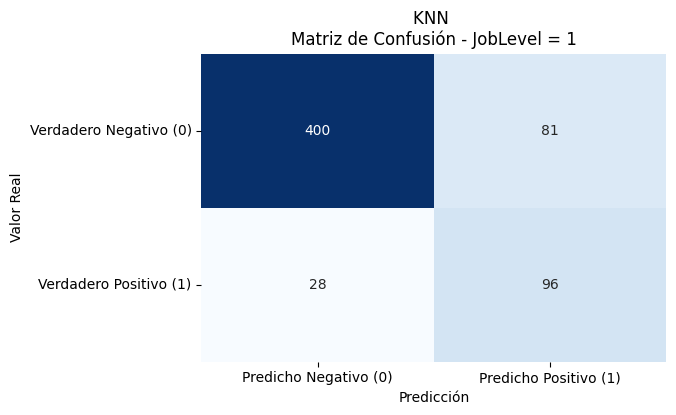


KNN - Matriz de confusión para JobLevel = 2:
Verdaderos Positivos (TP): 79
Verdaderos Negativos (TN): 373
Falsos Positivos (FP): 71
Falsos Negativos (FN): 82


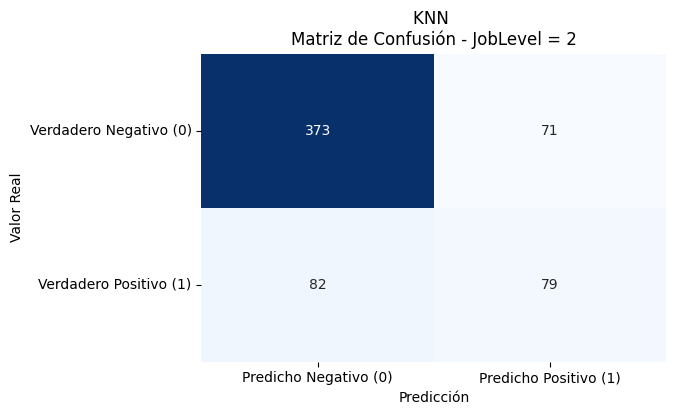


KNN - Matriz de confusión para JobLevel = 3:
Verdaderos Positivos (TP): 129
Verdaderos Negativos (TN): 313
Falsos Positivos (FP): 88
Falsos Negativos (FN): 75


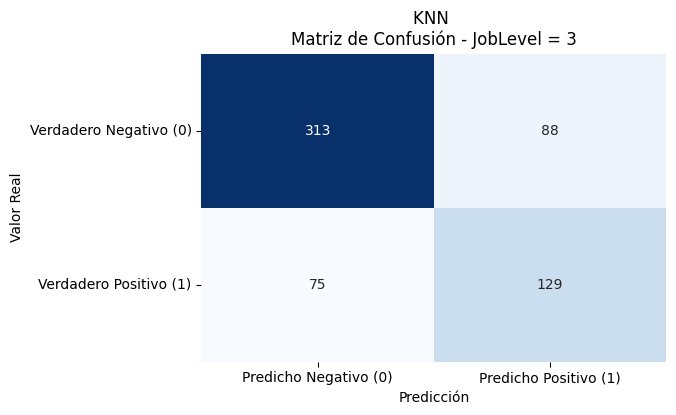


KNN - Matriz de confusión para JobLevel = 4:
Verdaderos Positivos (TP): 19
Verdaderos Negativos (TN): 520
Falsos Positivos (FP): 12
Falsos Negativos (FN): 54


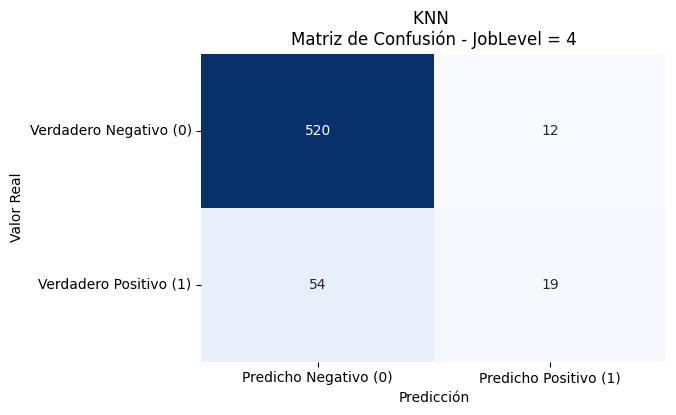

In [57]:
# Iterar sobre cada nivel de JobLevel
for nivel in np.unique(y_test):
    print(f"\nKNN - Matriz de confusión para JobLevel = {nivel}:")
    
    # Convertir el problema en binario: 1 si es el nivel actual, 0 en caso contrario
    y_test_binario = (y_test == nivel).astype(int)
    y_pred_binario = (y_pred == nivel).astype(int)
    
    # Obtener la matriz de confusión para el nivel actual
    conf_matrix = confusion_matrix(y_test_binario, y_pred_binario)
    
    # Extraer TN, FP, FN, TP
    if conf_matrix.shape == (2, 2):
        TN, FP, FN, TP = conf_matrix.ravel()
        
        # Mostrar los valores de TP, TN, FP y FN
        print(f'Verdaderos Positivos (TP): {TP}')
        print(f'Verdaderos Negativos (TN): {TN}')
        print(f'Falsos Positivos (FP): {FP}')
        print(f'Falsos Negativos (FN): {FN}')
        
        # Graficar la matriz de confusión
        conf_matrix_df = pd.DataFrame(conf_matrix, index=['Verdadero Negativo (0)', 'Verdadero Positivo (1)'], 
                                      columns=['Predicho Negativo (0)', 'Predicho Positivo (1)'])
        
        plt.figure(figsize=(6, 4))
        sns.heatmap(conf_matrix_df, annot=True, fmt='g', cmap="Blues", cbar=False)
        plt.title(f'KNN \nMatriz de Confusión - JobLevel = {nivel}')
        plt.xlabel('Predicción')
        plt.ylabel('Valor Real')
        # Guardar el gráfico como una imagen
        plt.savefig(f'graficos/Grafico17 - KNN - Matriz de confusion JobLevel {nivel}', bbox_inches='tight')
        plt.show()


    else:
        print(f"La matriz de confusión para JobLevel {nivel} no es válida para el problema binario.")

## Comparación de módelos

In [58]:
# Resumen de errores
Modelo = ['Regresión Logística', 'Árboles de decisión', 'Random Forest', 'XGBoost', 'KNN' ]
Precision_lista = [accuracy_regresion_logistica, accuracy_arboles_decision, accuracy_randomforest, accuracy_xgb, accuracy_knn ]
Error_lista = [mse_regresion_logistica, mse_arboles_decision, mse_randomforest, mse_xgb, mse_knn ]

# Multiplicar cada valor por 100
Precision_lista_porc = [p * 100 for p in Precision_lista]
Error_lista_porc = [e * 100 for e in Error_lista]

# Crear un diccionario a partir de las listas
data = {
    'Modelo': Modelo,
    'Precisión (%)': Precision_lista_porc,
    'Error (%)': Error_lista_porc
}

# Crear el DataFrame
df_resumen_ML = pd.DataFrame(data)

df_resumen_ML.head()



,Modelo,Precisión (%),Error (%)
0,Regresión Logística,97.685950,2.314050
1,Árboles de decisión,99.834711,0.165289
2,Random Forest,99.504132,0.495868
3,XGBoost,100.000000,0.000000
4,KNN,56.528926,62.809917


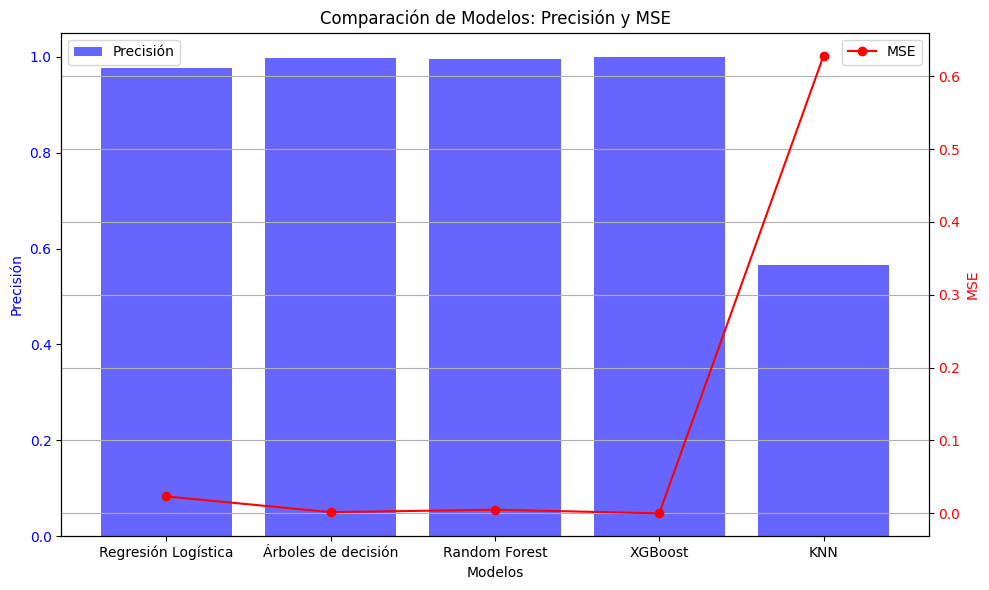

In [59]:
# GRAFICO ERRORES CUADRATICOS
# Convertir listas a arrays de numpy para facilitar cálculos
Precision = np.array(Precision_lista)
Error = np.array(Error_lista)

# Graficar precisión y MSE
fig, ax1 = plt.subplots(figsize=(10, 6))

# Graficar precisión
ax1.set_title('Comparación de Modelos: Precisión y MSE')
ax1.set_xlabel('Modelos')
ax1.set_ylabel('Precisión', color='blue')
ax1.bar(Modelo, Precision, color='blue', alpha=0.6, label='Precisión')
ax1.tick_params(axis='y', labelcolor='blue')

# Crear un segundo eje y para graficar MSE
ax2 = ax1.twinx()
ax2.set_ylabel('MSE', color='red')
ax2.plot(Modelo, Error, color='red', marker='o', label='MSE')
ax2.tick_params(axis='y', labelcolor='red')

# Añadir leyendas y ajustar layout
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
# Guardar el gráfico como una imagen
plt.savefig(f'graficos/Grafico18 - Comparación de modelos', bbox_inches='tight')
plt.show()

# Conclusiones Machine Learning

Recordar que las hipótesis fueron corroboradas en el 
[análisis exploratorio.](#conclusiones-análisis-exploratorio)

- Al tener variables categóricas, métodos no supervizados como k-means no son óptimos para el trabajo.
- One-hot encoding y Label encoder son métodos óptimos para dividir los dataset con elementos categóricos. Sin embargo, aunque Label encoder puede ser más preciso, también es más laborioso por definir las categorías según nivel.
- Para el dataset actual el módelo más preciso fue XGBoost con una precisión del 100%. Sin embargo, cabe resaltar, que los errores se pueden dar y tanto árboles de decisión como Random Fores estabán por encima del 97% de precisión. Aún asi, de esos 3 módelos, el más veloz fue XGBoost.
- KNN no fue nada óptimo para el proceso llegando a una precisión aproximada del 55%.